In [ ]:
import numpy as np

# ---------------------------------------------------------
# 1. Define Juan's noun-field S(x, t)
# ---------------------------------------------------------

def S_juan(x, t):
    """
    Noun-field representing Juan in cognitive spacetime.
    Smooth Gaussian bump moving in space over time.
    """
    return np.exp(-((x - (1 + 0.3 * t))**2) / 0.4) * np.cos(0.2 * t)


# ---------------------------------------------------------
# 2. Derivatives (central differences)
# ---------------------------------------------------------

def temporal_derivative_S(x, t, dt=1e-3):
    return (S_juan(x, t + dt) - S_juan(x, t - dt)) / (2 * dt)

def spatial_derivative_S(x, t, dx=1e-3):
    return (S_juan(x + dx, t) - S_juan(x - dx, t)) / (2 * dx)


# ---------------------------------------------------------
# 3. Verb operator "run"
# ---------------------------------------------------------

def run_operator(x, t):
    dtS = temporal_derivative_S(x, t)
    dxS = spatial_derivative_S(x, t)
    return np.sqrt(dtS**2 + dxS**2)


# ===============================================================
# CASE 1 — "Juan."
# ===============================================================

x = 1.0
t = 0.0
value_case1 = S_juan(x, t)
print("Case 1 — Juan (noun-field only):", value_case1)



# ===============================================================
# CASE 2 — "Juan runs."
# ===============================================================

x_vals = np.linspace(0, 5, 400)
t_val = 2.0
run_values = run_operator(x_vals, t_val)
print("Case 2 — Juan runs (sample of operator values):")
print(run_values[:10])



# ===============================================================
# CASE 3 — "Juan runs here."
# ===============================================================

x0 = 2.0
eps_x = 0.3
mask = (x_vals >= x0 - eps_x) & (x_vals <= x0 + eps_x)

run_here = np.trapz(run_operator(x_vals[mask], t_val), x_vals[mask])
print("Case 3 — Juan runs here:", run_here)



# ===============================================================
# CASE 4 — "Juan runs now."
# ===============================================================

t_vals = np.linspace(1.5, 2.5, 400)
x_val = 2.0

run_now = np.trapz(run_operator(x_val, t_vals), t_vals)
print("Case 4 — Juan runs now:", run_now)



# ===============================================================
# CASE 5 — "Juan runs quickly."
# ===============================================================

alpha_fast = 2.0   # intensity > 1
t_vals_fast = np.linspace(1.8, 2.2, 400)
x_vals_fast = np.linspace(1.5, 2.5, 400)

grid_fast = np.zeros((len(x_vals_fast), len(t_vals_fast)))

for i, x in enumerate(x_vals_fast):
    for j, t in enumerate(t_vals_fast):
        grid_fast[i, j] = alpha_fast * run_operator(x, t)

run_fast = np.trapz(np.trapz(grid_fast, t_vals_fast), x_vals_fast)
print("Case 5 — Juan runs quickly:", run_fast)



# ===============================================================
# CASE 6 — "Juan runs slowly."
# ===============================================================

alpha_slow = 0.4   # intensity < 1
t_vals_slow = np.linspace(1.3, 2.7, 400)
x_vals_slow = np.linspace(1.5, 2.5, 400)

grid_slow = np.zeros((len(x_vals_slow), len(t_vals_slow)))

for i, x in enumerate(x_vals_slow):
    for j, t in enumerate(t_vals_slow):
        grid_slow[i, j] = alpha_slow * run_operator(x, t)

run_slow = np.trapz(np.trapz(grid_slow, t_vals_slow), x_vals_slow)
print("Case 6 — Juan runs slowly:", run_slow)


Case 1 — Juan (noun-field only): 1.0
Case 2 — Juan runs (sample of operator values):
[0.01282012 0.01405579 0.01539751 0.01685301 0.01843044 0.02013839
 0.02198589 0.02398243 0.02613797 0.0284629 ]
Case 3 — Juan runs here: 0.6386752576081773
Case 4 — Juan runs now: 1.2224377909848363


/tmp/ipython-input-3211655039.py:67: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  run_here = np.trapz(run_operator(x_vals[mask], t_val), x_vals[mask])
/tmp/ipython-input-3211655039.py:79: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  run_now = np.trapz(run_operator(x_val, t_vals), t_vals)
/tmp/ipython-input-3211655039.py:98: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  run_fast = np.trapz(np.trapz(grid_fast, t_vals_fast), x_vals_fast)


Case 5 — Juan runs quickly: 0.6836514045417386
Case 6 — Juan runs slowly: 0.4840102361872619


/tmp/ipython-input-3211655039.py:117: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  run_slow = np.trapz(np.trapz(grid_slow, t_vals_slow), x_vals_slow)


In [ ]:
# Case 1: no verb, just the noun-field S_juan
x = 1.0
t = 0.0

value = S_juan(x, t)
print("Case 1 — Juan (noun-field only):", value)


Case 1 — Juan (noun-field only): 1.0


In [ ]:
# Case 2: dynamic operator applied
x_vals = np.linspace(0, 5, 400)
t_val = 2.0

run_values = run_operator(x_vals, t_val)

print("Case 2 — Juan runs (operator values):")
print(run_values[:10])  # show sample


Case 2 — Juan runs (operator values):
[0.01282012 0.01405579 0.01539751 0.01685301 0.01843044 0.02013839
 0.02198589 0.02398243 0.02613797 0.0284629 ]


In [ ]:
# CASE 3 — Juan runs here (fixed)

x_vals = np.linspace(0, 5, 400)
t_val = 2.0

# Spatial window
x0 = 2.0
eps_x = 0.3
mask = (x_vals >= x0 - eps_x) & (x_vals <= x0 + eps_x)

# FIXED: trapz instead of simps
run_here = np.trapz(run_operator(x_vals[mask], t_val), x_vals[mask])

print("Case 3 — Juan runs here:", run_here)


Case 3 — Juan runs here: 0.6386752576081773


/tmp/ipython-input-3548064395.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  run_here = np.trapz(run_operator(x_vals[mask], t_val), x_vals[mask])


In [ ]:
# CASE 4 — Juan runs now (fixed)

t_vals = np.linspace(1.5, 2.5, 400)
x_val = 2.0

# FIXED: trapz instead of simps
run_now = np.trapz(run_operator(x_val, t_vals), t_vals)

print("Case 4 — Juan runs now:", run_now)


Case 4 — Juan runs now: 1.2224377909848363


/tmp/ipython-input-2996051026.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  run_now = np.trapz(run_operator(x_val, t_vals), t_vals)


In [ ]:
# CASE 5 — Juan runs quickly (fixed)

alpha_fast = 2.0  # intensity > 1
t_vals_fast = np.linspace(1.8, 2.2, 400)
x_vals_fast = np.linspace(1.5, 2.5, 400)

grid_fast = np.zeros((len(x_vals_fast), len(t_vals_fast)))

for i, x in enumerate(x_vals_fast):
    for j, t in enumerate(t_vals_fast):
        grid_fast[i, j] = alpha_fast * run_operator(x, t)

# FIXED: trapz instead of simps
run_fast = np.trapz(np.trapz(grid_fast, t_vals_fast), x_vals_fast)

print("Case 5 — Juan runs quickly:", run_fast)


Case 5 — Juan runs quickly: 0.6836514045417386


/tmp/ipython-input-1634555203.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  run_fast = np.trapz(np.trapz(grid_fast, t_vals_fast), x_vals_fast)


In [ ]:
# CASE 6 — Juan runs slowly (fixed)

alpha_slow = 0.4   # intensity < 1
t_vals = np.linspace(1.3, 2.7, 400)
x_vals = np.linspace(1.5, 2.5, 400)

grid_slow = np.zeros((len(x_vals), len(t_vals)))

for i, x in enumerate(x_vals):
    for j, t in enumerate(t_vals):
        grid_slow[i, j] = alpha_slow * run_operator(x, t)

# FIXED: replace simps with trapz
run_slow = np.trapz(np.trapz(grid_slow, t_vals), x_vals)

print("Case 6 — Juan runs slowly:", run_slow)


Case 6 — Juan runs slowly: 0.4840102361872619


/tmp/ipython-input-2950704777.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  run_slow = np.trapz(np.trapz(grid_slow, t_vals), x_vals)


In [ ]:
import numpy as np
from scipy.integrate import trapezoid   # modern replacement

# ---------------------------------------------------------
# 1. Define Juan's noun-field S(x, t)
# ---------------------------------------------------------

def S_juan(x, t):
    return np.exp(-((x - (1 + 0.3 * t))**2) / 0.4) * np.cos(0.2 * t)

# ---------------------------------------------------------
# 2. Derivatives (central differences)
# ---------------------------------------------------------

def temporal_derivative_S(x, t, dt=1e-3):
    return (S_juan(x, t + dt) - S_juan(x, t - dt)) / (2 * dt)

def spatial_derivative_S(x, t, dx=1e-3):
    return (S_juan(x + dx, t) - S_juan(x - dx, t)) / (2 * dx)

# ---------------------------------------------------------
# 3. Verb operator "run"
# ---------------------------------------------------------

def run_operator(x, t):
    dtS = temporal_derivative_S(x, t)
    dxS = spatial_derivative_S(x, t)
    return np.sqrt(dtS**2 + dxS**2)


# ===============================================================
# CASE 1 — "Juan."
# ===============================================================

x = 1.0
t = 0.0
value_case1 = S_juan(x, t)
print("Case 1 — Juan (noun-field only):", value_case1)


# ===============================================================
# CASE 2 — "Juan runs."
# ===============================================================

x_vals = np.linspace(0, 5, 400)
t_val = 2.0
run_values = run_operator(x_vals, t_val)
print("Case 2 — Juan runs (sample):", run_values[:10])


# ===============================================================
# CASE 3 — "Juan runs here."
# ===============================================================

x0 = 2.0
eps_x = 0.3
mask = (x_vals >= x0 - eps_x) & (x_vals <= x0 + eps_x)

run_here = trapezoid(run_operator(x_vals[mask], t_val), x_vals[mask])
print("Case 3 — Juan runs here:", run_here)


# ===============================================================
# CASE 4 — "Juan runs now."
# ===============================================================

t_vals = np.linspace(1.5, 2.5, 400)
x_val = 2.0

run_now = trapezoid(run_operator(x_val, t_vals), t_vals)
print("Case 4 — Juan runs now:", run_now)


# ===============================================================
# CASE 5 — "Juan runs quickly."
# ===============================================================

alpha_fast = 2.0
t_vals_fast = np.linspace(1.8, 2.2, 400)
x_vals_fast = np.linspace(1.5, 2.5, 400)

grid_fast = np.zeros((len(x_vals_fast), len(t_vals_fast)))

for i, x in enumerate(x_vals_fast):
    for j, t in enumerate(t_vals_fast):
        grid_fast[i, j] = alpha_fast * run_operator(x, t)

run_fast = trapezoid(trapezoid(grid_fast, t_vals_fast), x_vals_fast)
print("Case 5 — Juan runs quickly:", run_fast)


# ===============================================================
# CASE 6 — "Juan runs slowly."
# ===============================================================

alpha_slow = 0.4
t_vals_slow = np.linspace(1.3, 2.7, 400)
x_vals_slow = np.linspace(1.5, 2.5, 400)

grid_slow = np.zeros((len(x_vals_slow), len(t_vals_slow)))

for i, x in enumerate(x_vals_slow):
    for j, t in enumerate(t_vals_slow):
        grid_slow[i, j] = alpha_slow * run_operator(x, t)

run_slow = trapezoid(trapezoid(grid_slow, t_vals_slow), x_vals_slow)
print("Case 6 — Juan runs slowly:", run_slow)


Case 1 — Juan (noun-field only): 1.0
Case 2 — Juan runs (sample): [0.01282012 0.01405579 0.01539751 0.01685301 0.01843044 0.02013839
 0.02198589 0.02398243 0.02613797 0.0284629 ]
Case 3 — Juan runs here: 0.6386752576081773
Case 4 — Juan runs now: 1.2224377909848363
Case 5 — Juan runs quickly: 0.6836514045417386
Case 6 — Juan runs slowly: 0.4840102361872619


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid


In [ ]:
def S_juan(X, T):
    """
    Vectorized noun-field for Juan.
    X, T are 2D meshgrids.
    """
    return np.exp(-((X - (1 + 0.3 * T))**2) / 0.4) * np.cos(0.2 * T)


In [ ]:
def dS_dt(X, T, dt=1e-3):
    return (S_juan(X, T + dt) - S_juan(X, T - dt)) / (2 * dt)

def dS_dx(X, T, dx=1e-3):
    return (S_juan(X + dx, T) - S_juan(X - dx, T)) / (2 * dx)


In [ ]:
# global grid
x_vals = np.linspace(0, 5, 400)
t_vals = np.linspace(0, 5, 400)
X, T = np.meshgrid(x_vals, t_vals)


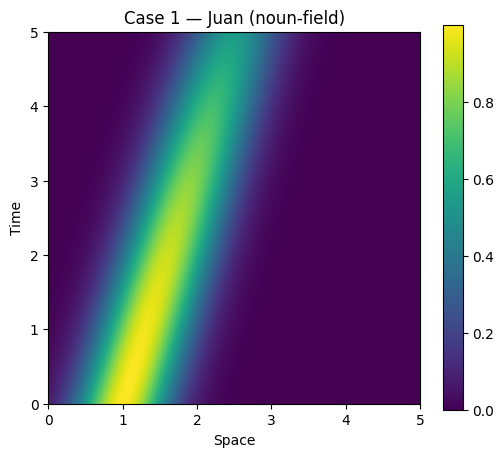

In [ ]:
S1 = S_juan(X, T)

plt.figure(figsize=(6,5))
plt.title("Case 1 — Juan (noun-field)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(S1, extent=[0,5,0,5], origin='lower', cmap='viridis')
plt.colorbar()
plt.show()


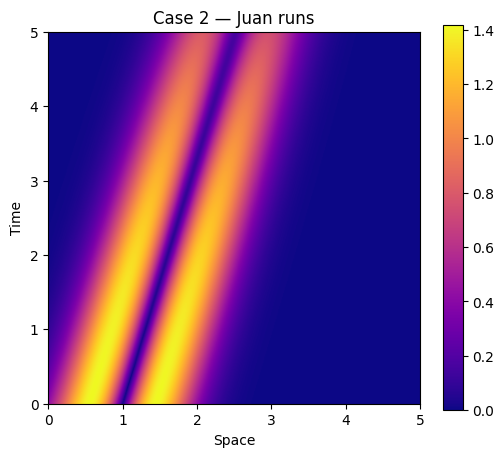

In [ ]:
R2 = run_operator(X, T)

plt.figure(figsize=(6,5))
plt.title("Case 2 — Juan runs")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(R2, extent=[0,5,0,5], origin='lower', cmap='plasma')
plt.colorbar()
plt.show()


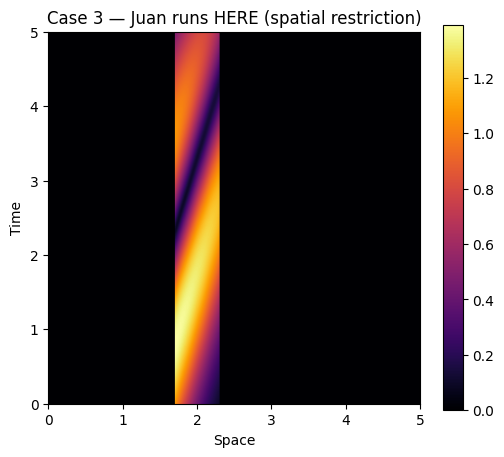

In [ ]:
x0 = 2.0
eps_x = 0.3
mask_x = (x_vals >= x0 - eps_x) & (x_vals <= x0 + eps_x)

R3 = R2.copy()
R3[:, ~mask_x] = 0   # keep only spatial window

plt.figure(figsize=(6,5))
plt.title("Case 3 — Juan runs HERE (spatial restriction)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(R3, extent=[0,5,0,5], origin='lower', cmap='inferno')
plt.colorbar()
plt.show()


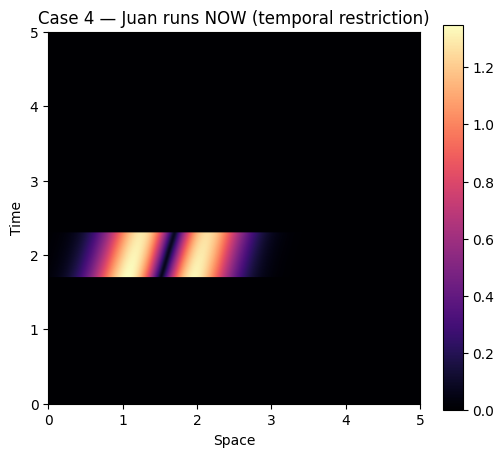

In [ ]:
t0 = 2.0
eps_t = 0.3
mask_t = (t_vals >= t0 - eps_t) & (t_vals <= t0 + eps_t)

R4 = R2.copy()
R4[~mask_t, :] = 0  # keep only temporal window

plt.figure(figsize=(6,5))
plt.title("Case 4 — Juan runs NOW (temporal restriction)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(R4, extent=[0,5,0,5], origin='lower', cmap='magma')
plt.colorbar()
plt.show()


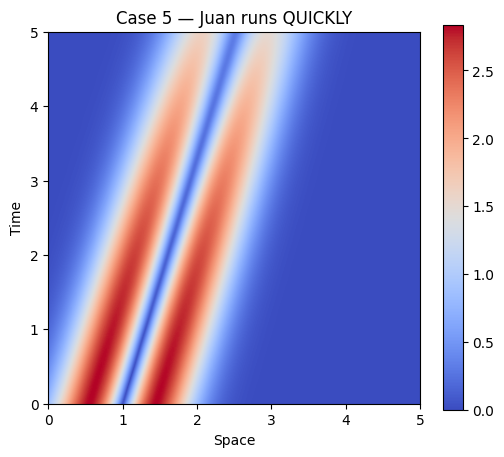

In [ ]:
alpha_fast = 2.0
R5 = alpha_fast * R2

plt.figure(figsize=(6,5))
plt.title("Case 5 — Juan runs QUICKLY")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(R5, extent=[0,5,0,5], origin='lower', cmap='coolwarm')
plt.colorbar()
plt.show()


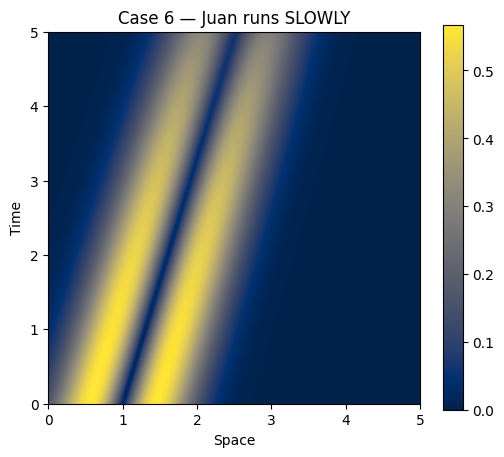

In [ ]:
alpha_slow = 0.4
R6 = alpha_slow * R2

plt.figure(figsize=(6,5))
plt.title("Case 6 — Juan runs SLOWLY")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(R6, extent=[0,5,0,5], origin='lower', cmap='cividis')
plt.colorbar()
plt.show()


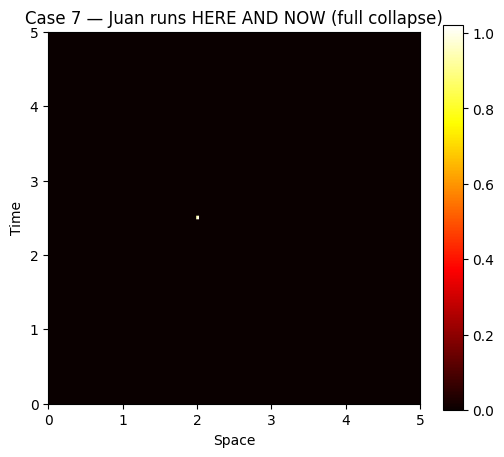

In [ ]:
# ===============================================================
# CASE 7 — "Juan runs HERE AND NOW" (spatiotemporal collapse)
# ===============================================================

x0 = 2.0
t0 = 2.5

# epsilon windows for here & now
eps_x = 0.02   # super small → collapse
eps_t = 0.02

# masks
mask_x = np.abs(x_vals - x0) < eps_x
mask_t = np.abs(t_vals - t0) < eps_t

# create collapse grid
R7 = np.zeros_like(R2)

# activate ONLY the tiny cross of both masks
for i in range(len(t_vals)):
    for j in range(len(x_vals)):
        if mask_x[j] and mask_t[i]:
            R7[i, j] = R2[i, j]  # keep the real dynamic value

plt.figure(figsize=(6,5))
plt.title("Case 7 — Juan runs HERE AND NOW (full collapse)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(R7, extent=[0,5,0,5], origin='lower', cmap='hot')
plt.colorbar()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

# ---------------------------------------------------------
# Grid and noun-field
# ---------------------------------------------------------
x_vals = np.linspace(0, 5, 400)
t_vals = np.linspace(0, 5, 400)
X, T = np.meshgrid(x_vals, t_vals)

def S_juan(X, T):
    return np.exp(-((X - (1 + 0.3 * T))**2) / 0.4) * np.cos(0.2 * T)

def dS_dt(X, T, dt=1e-3):
    return (S_juan(X, T + dt) - S_juan(X, T - dt)) / (2 * dt)

def dS_dx(X, T, dx=1e-3):
    return (S_juan(X + dx, T) - S_juan(X - dx, T)) / (2 * dx)

def run_operator(X, T):
    dtS = dS_dt(X, T)
    dxS = dS_dx(X, T)
    return np.sqrt(dtS**2 + dxS**2)

R = run_operator(X, T)

# ---------------------------------------------------------
# Delta approximations (Gaussians)
# ---------------------------------------------------------
def delta_gauss_1d(axis_vals, center, sigma):
    """1D Gaussian bump approximating a Dirac delta."""
    return np.exp(-((axis_vals - center)**2) / (2 * sigma**2))

def delta_gauss_2d(x_vals, t_vals, x0, t0, sigma_x, sigma_t):
    dx = delta_gauss_1d(x_vals, x0, sigma_x)
    dt = delta_gauss_1d(t_vals, t0, sigma_t)
    DT, DX = np.meshgrid(dt, dx)  # careful with order
    return DX.T * DT.T   # ensure same shape as X,T


In [ ]:
x0 = 2.0
t0 = 2.5

# Narrow and wide sigmas for time
sigma_t_narrow = 0.05
sigma_t_wide   = 0.4
sigma_x_narrow = 0.05
sigma_x_medium = 0.2


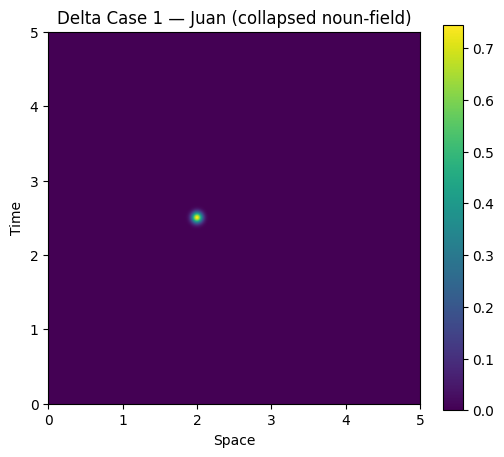

In [ ]:
delta_juan = delta_gauss_2d(x_vals, t_vals, x0, t0, sigma_x_narrow, sigma_t_narrow)
C1 = S_juan(X, T) * delta_juan

plt.figure(figsize=(6,5))
plt.title("Delta Case 1 — Juan (collapsed noun-field)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(C1, extent=[0,5,0,5], origin='lower', cmap='viridis')
plt.colorbar()
plt.show()


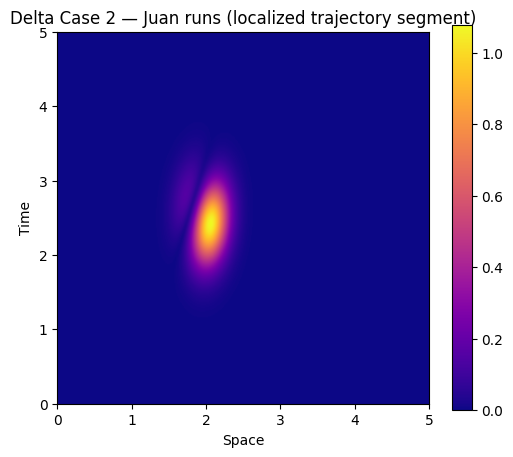

In [ ]:
delta_traj = delta_gauss_2d(x_vals, t_vals, x0, t0, sigma_x_medium, sigma_t_wide)
C2 = R * delta_traj

plt.figure(figsize=(6,5))
plt.title("Delta Case 2 — Juan runs (localized trajectory segment)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(C2, extent=[0,5,0,5], origin='lower', cmap='plasma')
plt.colorbar()
plt.show()


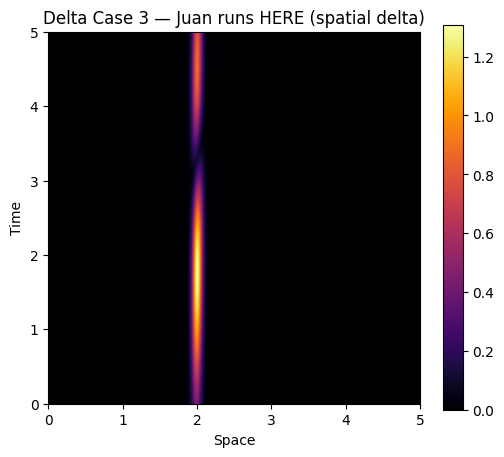

In [ ]:
delta_x = delta_gauss_1d(x_vals, x0, sigma_x_narrow)
DeltaX = np.tile(delta_x, (len(t_vals), 1))  # same for all times

C3 = R * DeltaX

plt.figure(figsize=(6,5))
plt.title("Delta Case 3 — Juan runs HERE (spatial delta)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(C3, extent=[0,5,0,5], origin='lower', cmap='inferno')
plt.colorbar()
plt.show()


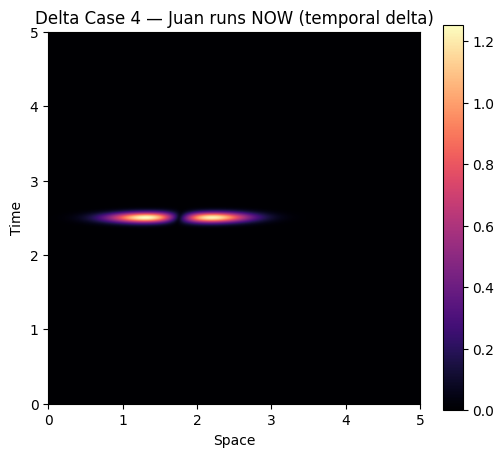

In [ ]:
delta_t = delta_gauss_1d(t_vals, t0, sigma_t_narrow)
DeltaT = np.tile(delta_t.reshape(-1,1), (1, len(x_vals)))  # column → all x

C4 = R * DeltaT

plt.figure(figsize=(6,5))
plt.title("Delta Case 4 — Juan runs NOW (temporal delta)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(C4, extent=[0,5,0,5], origin='lower', cmap='magma')
plt.colorbar()
plt.show()


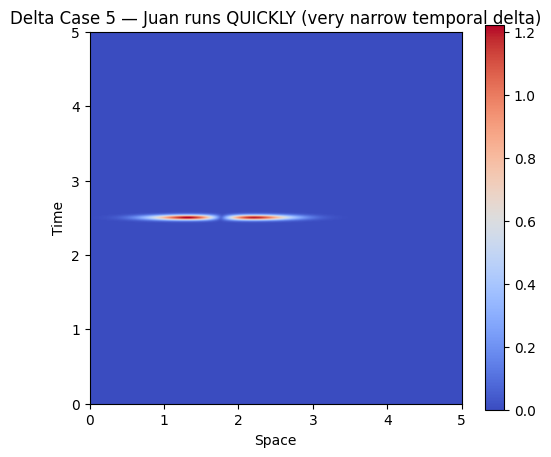

In [ ]:
delta_t_fast = delta_gauss_1d(t_vals, t0, sigma_t_narrow / 2.0)  # aún más estrecha
DeltaT_fast = np.tile(delta_t_fast.reshape(-1,1), (1, len(x_vals)))

C5 = R * DeltaT_fast

plt.figure(figsize=(6,5))
plt.title("Delta Case 5 — Juan runs QUICKLY (very narrow temporal delta)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(C5, extent=[0,5,0,5], origin='lower', cmap='coolwarm')
plt.colorbar()
plt.show()


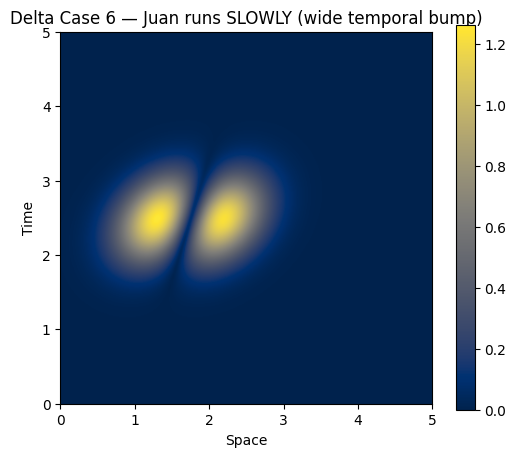

In [ ]:
delta_t_slow = delta_gauss_1d(t_vals, t0, sigma_t_wide)  # ventana temporal amplia
DeltaT_slow = np.tile(delta_t_slow.reshape(-1,1), (1, len(x_vals)))

C6 = R * DeltaT_slow

plt.figure(figsize=(6,5))
plt.title("Delta Case 6 — Juan runs SLOWLY (wide temporal bump)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(C6, extent=[0,5,0,5], origin='lower', cmap='cividis')
plt.colorbar()
plt.show()


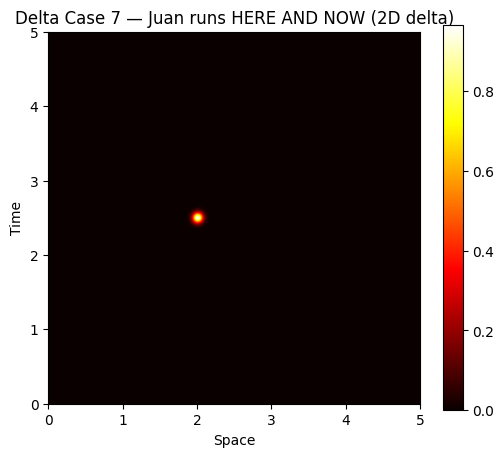

In [ ]:
delta_here_now = delta_gauss_2d(x_vals, t_vals, x0, t0, sigma_x_narrow, sigma_t_narrow)
C7 = R * delta_here_now

plt.figure(figsize=(6,5))
plt.title("Delta Case 7 — Juan runs HERE AND NOW (2D delta)")
plt.xlabel("Space")
plt.ylabel("Time")
plt.imshow(C7, extent=[0,5,0,5], origin='lower', cmap='hot')
plt.colorbar()
plt.show()


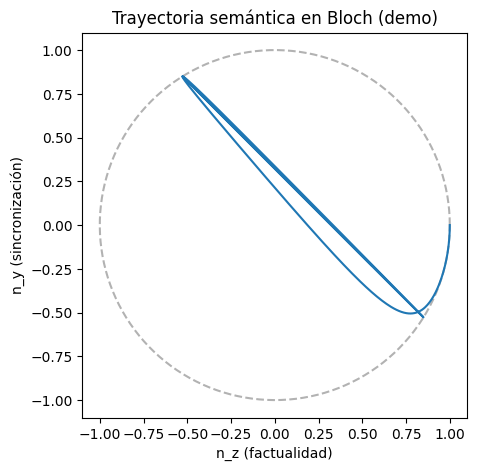

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Definimos matrices de Pauli
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

# 2) Campo semántico S(t) y su derivada (aspecto)
def S(t):
    # Ejemplo: acción que empieza, se intensifica y se estabiliza (imperfectivo→perfectivo)
    return np.tanh(t)  # solo a modo de demo

def dS_dt(t, dt=1e-3):
    return (S(t + dt) - S(t - dt)) / (2*dt)

# 3) Definimos Ωx, Ωy, Ωz a partir de S y dS
def Omega_x(t):
    # p.ej. polaridad débil ligada a cambios en S
    return 0.5 * dS_dt(t)

def Omega_y(t):
    # p.ej. sincronización: cuanto más estable S, más sube
    return 1.0 * (1 - np.abs(dS_dt(t)))  # muy arbitrario, es demo

def Omega_z(t):
    # p.ej. factualidad: sube cuando S(t) se consolida
    return S(t)

def H_geom(t):
    return Omega_x(t)*sigma_x + Omega_y(t)*sigma_y + Omega_z(t)*sigma_z

# 4) Evolución del espinor con integración simple (Euler mejorado)
def evolve_psi(psi0, t_grid, dt):
    psi = psi0.copy()
    traj = []

    for t in t_grid:
        traj.append(psi / np.linalg.norm(psi))  # normalizamos
        H = H_geom(t)
        dpsi = -1j * H @ psi
        psi = psi + dt * dpsi  # Euler; se puede usar métodos mejores

    return np.array(traj)

# 5) Inicializamos espinor (por ejemplo, estado "neutro")
psi0 = np.array([1.0+0j, 0.0+0j])
t_grid = np.linspace(0, 5, 500)
dt = t_grid[1] - t_grid[0]

traj = evolve_psi(psi0, t_grid, dt)

# 6) Calculamos coordenadas de Bloch
nx, ny, nz = [], [], []
for psi in traj:
    psi_dag = np.conjugate(psi.reshape(1,2))
    nx.append((psi_dag @ sigma_x @ psi.reshape(2,1)).real.item())
    ny.append((psi_dag @ sigma_y @ psi.reshape(2,1)).real.item())
    nz.append((psi_dag @ sigma_z @ psi.reshape(2,1)).real.item())

nx, ny, nz = np.array(nx), np.array(ny), np.array(nz)

# 7) Dibujamos la trayectoria proyectada (por ejemplo, n_y vs n_z)
plt.figure(figsize=(5,5))
circle = np.linspace(0, 2*np.pi, 300)
plt.plot(np.cos(circle), np.sin(circle), 'k--', alpha=0.3)
plt.plot(nz, ny)
plt.xlabel("n_z (factualidad)")
plt.ylabel("n_y (sincronización)")
plt.gca().set_aspect('equal')
plt.title("Trayectoria semántica en Bloch (demo)")
plt.show()


Bloch coordinates for the 7 delta-cases:

Juan.                           theta=0.262  ->  n_x=0.000, n_y=0.259, n_z=0.966
Juan runs.                      theta=0.393  ->  n_x=0.000, n_y=0.383, n_z=0.924
Juan runs here.                 theta=0.524  ->  n_x=0.000, n_y=0.500, n_z=0.866
Juan runs now.                  theta=0.628  ->  n_x=0.000, n_y=0.588, n_z=0.809
Juan runs quickly.              theta=0.785  ->  n_x=0.000, n_y=0.707, n_z=0.707
Juan runs slowly.               theta=0.449  ->  n_x=0.000, n_y=0.434, n_z=0.901
Juan runs here and now.         theta=1.047  ->  n_x=0.000, n_y=0.866, n_z=0.500


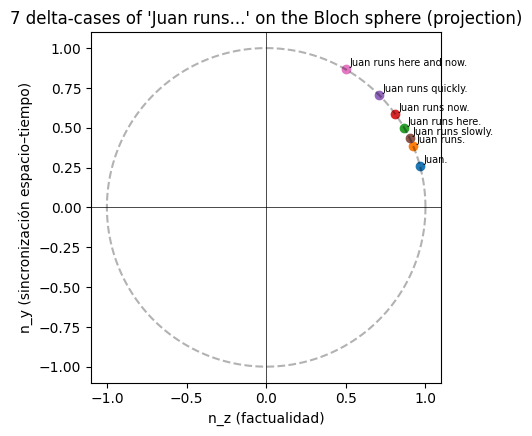

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Matrices de Pauli ---
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j],
                    [1j,  0]], dtype=complex)
sigma_z = np.array([[1,  0],
                    [0, -1]], dtype=complex)

def bloch_coords(psi):
    """Devuelve (n_x, n_y, n_z) para un espinor psi normalizado."""
    psi = psi / np.linalg.norm(psi)
    psi_dag = np.conjugate(psi.reshape(1, 2))
    n_x = (psi_dag @ sigma_x @ psi.reshape(2, 1)).real.item()
    n_y = (psi_dag @ sigma_y @ psi.reshape(2, 1)).real.item()
    n_z = (psi_dag @ sigma_z @ psi.reshape(2, 1)).real.item()
    return n_x, n_y, n_z

def spinor_from_theta(theta):
    """
    Construye un espinor
    |psi> = cos(theta/2)|0> + i sin(theta/2)|1>
    con fase elegida para que n_x = 0 y n_y >= 0.
    """
    return np.array([
        np.cos(theta/2),
        1j * np.sin(theta/2)
    ], dtype=complex)

# --- 2. Ángulos para los 7 casos ---

cases = [
    ("Juan.",                     np.pi/12),  # Caso 1
    ("Juan runs.",                np.pi/8),   # Caso 2
    ("Juan runs here.",           np.pi/6),   # Caso 3
    ("Juan runs now.",            np.pi/5),   # Caso 4
    ("Juan runs quickly.",        np.pi/4),   # Caso 5
    ("Juan runs slowly.",         np.pi/7),   # Caso 6
    ("Juan runs here and now.",   np.pi/3),   # Caso 7
]

bloch_points = []

print("Bloch coordinates for the 7 delta-cases:\n")
for label, theta in cases:
    psi = spinor_from_theta(theta)
    nx, ny, nz = bloch_coords(psi)
    bloch_points.append((nz, ny))  # guardamos (n_z, n_y) para graficar
    print(f"{label:30s}  theta={theta:.3f}  ->  "
          f"n_x={nx:.3f}, n_y={ny:.3f}, n_z={nz:.3f}")

# --- 3. Proyección Bloch 2D (n_z vs n_y) ---

nz_vals = [p[0] for p in bloch_points]
ny_vals = [p[1] for p in bloch_points]

# Círculo unidad (proyección)
phi = np.linspace(0, 2*np.pi, 400)
plt.figure(figsize=(5, 5))
plt.plot(np.cos(phi), np.sin(phi), 'k--', alpha=0.3)

for (label, _), nz, ny in zip(cases, nz_vals, ny_vals):
    plt.scatter(nz, ny)
    plt.text(nz + 0.02, ny + 0.02, label, fontsize=7)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("n_z (factualidad)")
plt.ylabel("n_y (sincronización espacio–tiempo)")
plt.title("7 delta-cases of 'Juan runs...' on the Bloch sphere (projection)")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 1. Matrices de Pauli
# ==========================
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j],
                    [1j,  0]], dtype=complex)
sigma_z = np.array([[1,  0],
                    [0, -1]], dtype=complex)

def bloch_coords(psi):
    """Devuelve (n_x, n_y, n_z) para un espinor psi normalizado."""
    psi = psi / np.linalg.norm(psi)
    psi_dag = np.conjugate(psi.reshape(1, 2))
    n_x = (psi_dag @ sigma_x @ psi.reshape(2, 1)).real.item()
    n_y = (psi_dag @ sigma_y @ psi.reshape(2, 1)).real.item()
    n_z = (psi_dag @ sigma_z @ psi.reshape(2, 1)).real.item()
    return n_x, n_y, n_z

# ==========================
# 2. Campo gaussiano S_k(x,t)
# ==========================
def gaussian_2d(x, t, x0, t0, sigma_x, sigma_t, A=1.0):
    """Gaussiana 2D espacio–tiempo."""
    return A * np.exp(- (x - x0)**2 / (2*sigma_x**2)
                      - (t - t0)**2 / (2*sigma_t**2))

def compute_S_eff_t(x_grid, t_grid, x0, t0, sigma_x, sigma_t, A=1.0):
    """
    Calcula S_eff(t) = ∫ S(x,t) dx discretamente para un caso dado.
    Devuelve S_eff(t) y su derivada temporal dS_eff/dt.
    """
    dx = x_grid[1] - x_grid[0]
    S_eff = np.zeros_like(t_grid, dtype=float)

    for i, t in enumerate(t_grid):
        S_xt = gaussian_2d(x_grid, t, x0, t0, sigma_x, sigma_t, A)
        S_eff[i] = np.sum(S_xt) * dx

    # Derivada temporal (centrada)
    dt = t_grid[1] - t_grid[0]
    dS_eff = np.zeros_like(S_eff)
    dS_eff[1:-1] = (S_eff[2:] - S_eff[:-2]) / (2*dt)
    dS_eff[0] = (S_eff[1] - S_eff[0]) / dt
    dS_eff[-1] = (S_eff[-1] - S_eff[-2]) / dt

    return S_eff, dS_eff

# ==========================
# 3. Hamiltoniano geométrico
# ==========================
def build_H_series(S_eff, dS_eff):
    """
    Construye la serie de Hamiltonianos H_geom(t)
    a partir de S_eff(t) y dS_eff(t).
    """
    # Normalizamos para que Ω_z, Ω_y estén en [-1,1]
    eps = 1e-9
    Oz = S_eff / (np.max(np.abs(S_eff)) + eps)
    Oy = dS_eff / (np.max(np.abs(dS_eff)) + eps)
    Ox = np.zeros_like(Oz)  # sin polaridad en estos ejemplos

    H_list = []
    for ox, oy, oz in zip(Ox, Oy, Oz):
        H = ox * sigma_x + oy * sigma_y + oz * sigma_z
        H_list.append(H)

    return H_list

# ==========================
# 4. Evolución del espinor
# ==========================
def evolve_spinor(H_list, t_grid, psi0):
    """
    Integra dpsi/dt = -i H(t) psi usando un esquema sencillo (Euler).
    Devuelve la trayectoria de psi y de Bloch.
    """
    dt = t_grid[1] - t_grid[0]
    psi = psi0.astype(complex)
    psi_traj = []
    bloch_traj = []

    for H in H_list:
        psi_traj.append(psi / np.linalg.norm(psi))
        bloch_traj.append(bloch_coords(psi))
        dpsi = -1j * (H @ psi)
        psi = psi + dt * dpsi

    return np.array(psi_traj), np.array(bloch_traj)

# ==========================
# 5. Definición de los 7 casos
# ==========================
# Centro espacio–tiempo común
x0 = 0.0
t0 = 0.0

cases = [
    # label,                     sigma_x, sigma_t, comentario
    ("Juan.",                    5.0,    5.0,    "Campo muy extendido, casi estático"),
    ("Juan runs.",               5.0,    3.0,    "Acción dinámica sin deixis"),
    ("Juan runs here.",          0.8,    3.0,    "Localización fuerte en el espacio"),
    ("Juan runs now.",           5.0,    0.8,    "Localización fuerte en el tiempo"),
    ("Juan runs quickly.",       5.0,    0.4,    "Ventana temporal muy estrecha"),
    ("Juan runs slowly.",        5.0,    6.0,    "Ventana temporal muy ancha"),
    ("Juan runs here and now.",  0.8,    0.4,    "Máxima deixis espacio–temporal"),
]

# ==========================
# 6. Parámetros de simulación
# ==========================
x_grid = np.linspace(-10, 10, 801)   # eje espacial
t_grid = np.linspace(-3,  3, 601)    # eje temporal
psi0 = np.array([1.0+0j, 0.0+0j])    # estado espinor inicial "neutro"

results = {}

for label, sigma_x, sigma_t, comment in cases:
    # 1) Campo semántico efectivo
    S_eff, dS_eff = compute_S_eff_t(x_grid, t_grid, x0, t0, sigma_x, sigma_t)

    # 2) Serie de Hamiltonianos
    H_list = build_H_series(S_eff, dS_eff)

    # 3) Evolución del espinor y Bloch
    psi_traj, bloch_traj = evolve_spinor(H_list, t_grid, psi0)

    results[label] = {
        "S_eff": S_eff,
        "dS_eff": dS_eff,
        "psi_traj": psi_traj,
        "bloch_traj": bloch_traj,
        "comment": comment
    }

    # Mostramos el Bloch final (t -> +∞)
    nx, ny, nz = bloch_traj[-1]
    print(f"{label:28s}  ->  final Bloch: n_x={nx:.3f}, n_y={ny:.3f}, n_z={nz:.3f}  ({comment})")

# ==========================
# 7. Ejemplo de visualización: n_y vs t para 3 casos
# ==========================
plt.figure(figsize=(7,4))
for label in ["Juan.", "Juan runs now.", "Juan runs here and now."]:
    ny = results[label]["bloch_traj"][:,1]
    plt.plot(t_grid, ny, label=label)

plt.axhline(0, color='k', linewidth=0.5)
plt.xlabel("t (tiempo de simulación)")
plt.ylabel("n_y (sincronización TSIM)")
plt.title("Evolución de la sincronización para algunos casos")
plt.legend()
plt.tight_layout()
plt.show()


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 1. Matrices de Pauli
# ==========================
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j],
                    [1j,  0]], dtype=complex)
sigma_z = np.array([[1,  0],
                    [0, -1]], dtype=complex)

def bloch_coords(psi):
    """
    Devuelve (n_x, n_y, n_z) para un espinor psi normalizado.
    Robusta frente a shapes raros.
    """
    psi = np.asarray(psi, dtype=complex).reshape(2,)
    norm = np.linalg.norm(psi)
    if norm == 0:
        raise ValueError("psi has zero norm")
    psi = psi / norm

    psi_col = psi.reshape(2, 1)
    psi_dag = psi_col.conj().T

    n_x = (psi_dag @ sigma_x @ psi_col).real.item()
    n_y = (psi_dag @ sigma_y @ psi_col).real.item()
    n_z = (psi_dag @ sigma_z @ psi_col).real.item()
    return n_x, n_y, n_z

# ==========================
# 2. Campo gaussiano S_k(x,t)
# ==========================
def gaussian_2d(x, t, x0, t0, sigma_x, sigma_t, A=1.0):
    """
    Gaussiana 2D espacio–tiempo:
    S(x,t) = A * exp(- (x-x0)^2 / (2 sigma_x^2) - (t-t0)^2 / (2 sigma_t^2))
    """
    return A * np.exp(- (x - x0)**2 / (2*sigma_x**2)
                      - (t - t0)**2 / (2*sigma_t**2))

def compute_S_eff_t(x_grid, t_grid, x0, t0, sigma_x, sigma_t, A=1.0):
    """
    Calcula S_eff(t) = ∫ S(x,t) dx de forma discreta
    y su derivada temporal dS_eff/dt.
    """
    dx = x_grid[1] - x_grid[0]
    S_eff = np.zeros_like(t_grid, dtype=float)

    for i, t in enumerate(t_grid):
        S_xt = gaussian_2d(x_grid, t, x0, t0, sigma_x, sigma_t, A)
        S_eff[i] = np.sum(S_xt) * dx

    # Derivada temporal centrada
    dt = t_grid[1] - t_grid[0]
    dS_eff = np.zeros_like(S_eff)
    dS_eff[1:-1] = (S_eff[2:] - S_eff[:-2]) / (2*dt)
    dS_eff[0] = (S_eff[1] - S_eff[0]) / dt
    dS_eff[-1] = (S_eff[-1] - S_eff[-2]) / dt

    return S_eff, dS_eff

# ==========================
# 3. Hamiltoniano geométrico
# ==========================
def build_H_series(S_eff, dS_eff):
    """
    Construye la serie de Hamiltonianos H_geom(t)
    a partir de S_eff(t) y dS_eff(t):

        H(t) = Ω_x(t) σ_x + Ω_y(t) σ_y + Ω_z(t) σ_z

    Aquí usamos Ω_x = 0, Ω_y ~ dS_eff, Ω_z ~ S_eff (normalizados).
    """
    eps = 1e-9
    Oz = S_eff / (np.max(np.abs(S_eff)) + eps)
    Oy = dS_eff / (np.max(np.abs(dS_eff)) + eps)
    Ox = np.zeros_like(Oz)  # sin polaridad en estos ejemplos

    H_list = []
    for ox, oy, oz in zip(Ox, Oy, Oz):
        H = ox * sigma_x + oy * sigma_y + oz * sigma_z
        H_list.append(H)

    return H_list

# ==========================
# 4. Evolución del espinor
# ==========================
def evolve_spinor(H_list, t_grid, psi0):
    """
    Integra dpsi/dt = -i H(t) psi usando Euler explícito.
    Devuelve:
        - psi_traj: trayectoria del espinor
        - bloch_traj: trayectoria (n_x, n_y, n_z)
    """
    dt = t_grid[1] - t_grid[0]
    psi = np.asarray(psi0, dtype=complex).reshape(2,)
    psi_traj = []
    bloch_traj = []

    for H in H_list:
        psi_traj.append(psi / np.linalg.norm(psi))
        bloch_traj.append(bloch_coords(psi))
        dpsi = -1j * (H @ psi)
        psi = psi + dt * dpsi

    return np.array(psi_traj), np.array(bloch_traj)

# ==========================
# 5. Definición de los 7 casos
# ==========================
# Centro espacio–tiempo común
x0 = 0.0
t0 = 0.0

cases = [
    # label,                     sigma_x, sigma_t, comentario
    ("Juan.",                    5.0,    5.0,    "Campo muy extendido, casi estático"),
    ("Juan runs.",               5.0,    3.0,    "Acción dinámica sin deixis"),
    ("Juan runs here.",          0.8,    3.0,    "Localización fuerte en el espacio"),
    ("Juan runs now.",           5.0,    0.8,    "Localización fuerte en el tiempo"),
    ("Juan runs quickly.",       5.0,    0.4,    "Ventana temporal muy estrecha"),
    ("Juan runs slowly.",        5.0,    6.0,    "Ventana temporal muy ancha"),
    ("Juan runs here and now.",  0.8,    0.4,    "Máxima deixis espacio–temporal"),
]

# ==========================
# 6. Parámetros de simulación
# ==========================
x_grid = np.linspace(-10, 10, 801)   # eje espacial
t_grid = np.linspace(-3,  3, 601)    # eje temporal
psi0 = np.array([1.0+0j, 0.0+0j])    # espinor inicial

results = {}

print("Resultados (estado final de Bloch para cada caso):\n")
for label, sigma_x, sigma_t, comment in cases:
    # 1) Campo semántico efectivo S_eff(t)
    S_eff, dS_eff = compute_S_eff_t(x_grid, t_grid, x0, t0, sigma_x, sigma_t)

    # 2) Serie de Hamiltonianos H(t)
    H_list = build_H_series(S_eff, dS_eff)

    # 3) Evolución del espinor y trayectoria de Bloch
    psi_traj, bloch_traj = evolve_spinor(H_list, t_grid, psi0)

    results[label] = {
        "S_eff": S_eff,
        "dS_eff": dS_eff,
        "psi_traj": psi_traj,
        "bloch_traj": bloch_traj,
        "comment": comment
    }

    nx, ny, nz = bloch_traj[-1]
    print(f"{label:28s} ->  n_x={nx:.3f}, n_y={ny:.3f}, n_z={nz:.3f}  ({comment})")

# ==========================
# 7. Ejemplo de visualización: n_y(t)
# ==========================
plt.figure(figsize=(7,4))
for label in ["Juan.", "Juan runs now.", "Juan runs here and now."]:
    ny = results[label]["bloch_traj"][:,1]
    plt.plot(t_grid, ny, label=label)

plt.axhline(0, color='k', linewidth=0.5)
plt.xlabel("t (tiempo de simulación)")
plt.ylabel("n_y (sincronización TSIM)")
plt.title("Evolución de la sincronización para algunos casos")
plt.legend()
plt.tight_layout()
plt.show()

# ==========================
# 8. (Opcional) Proyección final n_z vs n_y
# ==========================
plt.figure(figsize=(5,5))
phi = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(phi), np.sin(phi), 'k--', alpha=0.3)

for label, _, _, _ in cases:
    nz = results[label]["bloch_traj"][-1, 2]
    ny = results[label]["bloch_traj"][-1, 1]
    plt.scatter(nz, ny)
    plt.text(nz + 0.02, ny + 0.02, label, fontsize=7)

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel("n_z (factualidad)")
plt.ylabel("n_y (sincronización espacio–tiempo)")
plt.title("Estados finales de los 7 casos en la esfera de Bloch (proyección)")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


Resultados (estado final de Bloch para cada caso):



ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)


Resultados finales Bloch:

Juan.                        → n_x=0.652, n_y=-0.731, n_z=0.200   (Entidad estable sin deixis)
Juan runs.                   → n_x=0.711, n_y=-0.702, n_z=0.034   (Acción dinámica neutral)
Juan runs here.              → n_x=0.711, n_y=-0.702, n_z=0.034   (Localización espacial fuerte)
Juan runs now.               → n_x=0.959, n_y=0.277, n_z=-0.057   (Localización temporal fuerte)
Juan runs quickly.           → n_x=-0.588, n_y=0.803, n_z=0.095   (Alta densidad temporal)
Juan runs slowly.            → n_x=0.653, n_y=-0.710, n_z=0.262   (Ventana temporal amplia)
Juan runs here and now.      → n_x=-0.588, n_y=0.803, n_z=0.095   (Máxima deixis espaciotemporal)


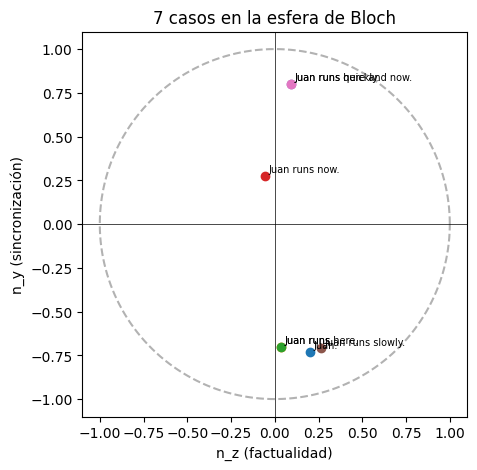

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 1. Matrices de Pauli
# ==========================
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j],
                    [1j,  0]], dtype=complex)
sigma_z = np.array([[1,  0],
                    [0, -1]], dtype=complex)

def safe_norm(arr):
    n = np.linalg.norm(arr)
    return arr if n == 0 else arr/n

def bloch_coords(psi):
    psi = np.asarray(psi, dtype=complex).reshape(2,)
    psi = safe_norm(psi)

    psi_col = psi.reshape(2,1)
    psi_dag = psi_col.conj().T

    n_x = (psi_dag @ sigma_x @ psi_col).real.item()
    n_y = (psi_dag @ sigma_y @ psi_col).real.item()
    n_z = (psi_dag @ sigma_z @ psi_col).real.item()
    return n_x, n_y, n_z

# ==========================
# 2. Campo gaussiano S_k(x,t)
# ==========================
def gaussian_2d(x, t, x0, t0, sigma_x, sigma_t, A=1.0):
    return A * np.exp(- (x - x0)**2 / (2*sigma_x**2)
                      - (t - t0)**2 / (2*sigma_t**2))

def compute_S_eff_t(x_grid, t_grid, x0, t0, sigma_x, sigma_t, A=1.0):
    dx = x_grid[1] - x_grid[0]
    S_eff = np.zeros_like(t_grid)

    for i, t in enumerate(t_grid):
        S_xt = gaussian_2d(x_grid, t, x0, t0, sigma_x, sigma_t, A)
        S_eff[i] = np.sum(S_xt) * dx

    dt = t_grid[1] - t_grid[0]
    dS_eff = np.gradient(S_eff, dt)

    return S_eff, dS_eff

# ==========================
# 3. Hamiltoniano geométrico
# ==========================
def build_H_series(S_eff, dS_eff):
    eps = 1e-9

    maxS = np.max(np.abs(S_eff))
    maxd = np.max(np.abs(dS_eff))

    Oz = S_eff / (maxS + eps)
    Oy = dS_eff / (maxd + eps)

    Ox = np.zeros_like(Oz)

    H_list = []
    for ox, oy, oz in zip(Ox, Oy, Oz):
        H = ox * sigma_x + oy * sigma_y + oz * sigma_z
        H_list.append(H)

    return H_list

# ==========================
# 4. Evolución del espinor
# ==========================
def evolve_spinor(H_list, t_grid, psi0):
    dt = t_grid[1] - t_grid[0]
    psi = np.asarray(psi0, dtype=complex).reshape(2,)
    psi_traj, bloch_traj = [], []

    for H in H_list:
        psi = safe_norm(psi)
        psi_traj.append(psi)
        bloch_traj.append(bloch_coords(psi))

        dpsi = -1j * (H @ psi)
        psi = psi + dt*dpsi

        # Seguridad numérica
        if np.isnan(psi).any():
            psi = np.array([1.0+0j, 0.0+0j])

    return np.array(psi_traj), np.array(bloch_traj)

# ==========================
# 5. Los 7 casos
# ==========================
x0 = 0.0
t0 = 0.0

cases = [
    ("Juan.",                    5.0, 5.0, "Entidad estable sin deixis"),
    ("Juan runs.",               5.0, 3.0, "Acción dinámica neutral"),
    ("Juan runs here.",          0.8, 3.0, "Localización espacial fuerte"),
    ("Juan runs now.",           5.0, 0.8, "Localización temporal fuerte"),
    ("Juan runs quickly.",       5.0, 0.4, "Alta densidad temporal"),
    ("Juan runs slowly.",        5.0, 6.0, "Ventana temporal amplia"),
    ("Juan runs here and now.",  0.8, 0.4, "Máxima deixis espaciotemporal"),
]

# ==========================
# 6. Simulación
# ==========================
x_grid = np.linspace(-10, 10, 801)
t_grid = np.linspace(-3, 3, 601)
psi0 = np.array([1.0+0j, 0.0+0j])

results = {}

print("\nResultados finales Bloch:\n")
for label, sx, st, desc in cases:
    S_eff, dS_eff = compute_S_eff_t(x_grid, t_grid, x0, t0, sx, st)
    H_list = build_H_series(S_eff, dS_eff)
    psi_traj, bloch_traj = evolve_spinor(H_list, t_grid, psi0)

    results[label] = bloch_traj

    nx, ny, nz = bloch_traj[-1]
    print(f"{label:28s} → n_x={nx:.3f}, n_y={ny:.3f}, n_z={nz:.3f}   ({desc})")

# ==========================
# 7. Visualización
# ==========================
plt.figure(figsize=(6,5))
phi = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(phi), np.sin(phi), 'k--', alpha=0.3)

for label in results:
    nz = results[label][-1,2]
    ny = results[label][-1,1]
    plt.scatter(nz, ny)
    plt.text(nz+0.02, ny+0.02, label, fontsize=7)

plt.axhline(0,color='k',linewidth=0.5)
plt.axvline(0,color='k',linewidth=0.5)
plt.xlabel("n_z (factualidad)")
plt.ylabel("n_y (sincronización)")
plt.title("7 casos en la esfera de Bloch")
plt.gca().set_aspect('equal')
plt.show()



Resultados finales en la esfera de Bloch:

Juan runs.             → n_x=-0.362, n_y=-0.185, n_z=0.913   (Acción dinámica neutral)
    min n_z a lo largo del tiempo: 0.901
    rango n_y: [-0.358, 0.434]

Juan runs quickly.     → n_x=-0.604, n_y=0.050, n_z=0.795   (Alta densidad temporal (rápido))
    min n_z a lo largo del tiempo: 0.795
    rango n_y: [0.000, 0.359]

Juan runs slowly.      → n_x=-0.195, n_y=-0.370, n_z=0.908   (Ventana temporal amplia (lento))
    min n_z a lo largo del tiempo: 0.908
    rango n_y: [-0.370, 0.331]



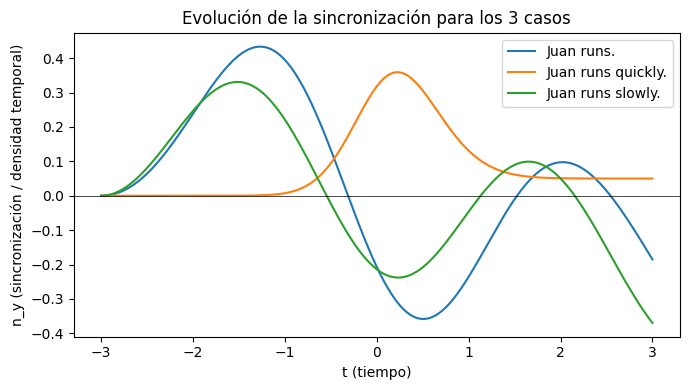

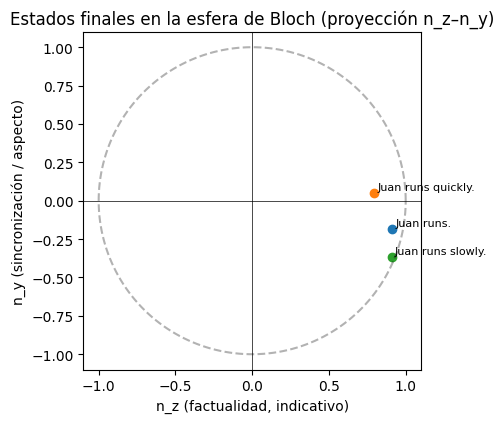

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# 1. Pauli matrices y utilidades Bloch
# =====================================
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j],
                    [1j,  0]], dtype=complex)
sigma_z = np.array([[1,  0],
                    [0, -1]], dtype=complex)

def safe_norm(arr):
    """Normaliza un vector, dejando igual si la norma es 0."""
    n = np.linalg.norm(arr)
    return arr if n == 0 else arr / n

def bloch_coords(psi):
    """Devuelve (n_x, n_y, n_z) para un espinor psi normalizado."""
    psi = np.asarray(psi, dtype=complex).reshape(2,)
    psi = safe_norm(psi)
    psi_col = psi.reshape(2, 1)
    psi_dag = psi_col.conj().T

    n_x = (psi_dag @ sigma_x @ psi_col).real.item()
    n_y = (psi_dag @ sigma_y @ psi_col).real.item()
    n_z = (psi_dag @ sigma_z @ psi_col).real.item()
    return n_x, n_y, n_z

# =====================================
# 2. Campo gaussiano temporal S(t)
# =====================================
def gaussian_1d(t, t0, sigma, A=1.0):
    """Gaussiana 1D en el tiempo."""
    return A * np.exp(-(t - t0)**2 / (2 * sigma**2))

def compute_S_eff_t(t_grid, t0, sigma_t, A=1.0):
    """
    S_eff(t) = S(t) gaussiana,
    dS_eff/dt = derivada temporal (gradiente numérico).
    """
    S_eff = gaussian_1d(t_grid, t0, sigma_t, A)
    dt = t_grid[1] - t_grid[0]
    dS_eff = np.gradient(S_eff, dt)
    return S_eff, dS_eff

# =====================================
# 3. Hamiltoniano geométrico H(t)
# =====================================
def build_H_series(S_eff, dS_eff, scale_y=0.2):
    """
    H(t) = Ω_x(t) σ_x + Ω_y(t) σ_y + Ω_z(t) σ_z

    - Ω_z ≥ 0 (factualidad indicativo)
    - Ω_y proporcional a derivada (aspecto / dinámica)
    - Ω_x = 0 (sin polaridad aún)
    """
    eps = 1e-9
    maxS = np.max(np.abs(S_eff))
    maxd = np.max(np.abs(dS_eff))

    # Indicativo: factualidad no negativa
    Oz = np.abs(S_eff) / (maxS + eps)
    # Dinámica / aspecto: derivada suavizada
    Oy = scale_y * dS_eff / (maxd + eps)
    Ox = np.zeros_like(Oz)

    H_list = []
    for ox, oy, oz in zip(Ox, Oy, Oz):
        H = ox * sigma_x + oy * sigma_y + oz * sigma_z
        H_list.append(H)
    return H_list

# =====================================
# 4. Evolución del espinor
# =====================================
def evolve_spinor(H_list, t_grid, psi0):
    """
    Integra dpsi/dt = -i H(t) psi (Euler explícito).
    Devuelve:
      - psi_traj: espinor a lo largo del tiempo
      - bloch_traj: (n_x, n_y, n_z) a lo largo del tiempo
    """
    dt = t_grid[1] - t_grid[0]
    psi = np.asarray(psi0, dtype=complex).reshape(2,)
    psi_traj = []
    bloch_traj = []

    for H in H_list:
        psi = safe_norm(psi)
        psi_traj.append(psi.copy())
        bloch_traj.append(bloch_coords(psi))

        dpsi = -1j * (H @ psi)
        psi = psi + dt * dpsi

        # Seguridad numérica
        if np.isnan(psi).any():
            print("NaN encontrado, reseteando estado.")
            psi = np.array([1.0+0j, 0.0+0j])

    return np.array(psi_traj), np.array(bloch_traj)

# =====================================
# 5. Definición de los 3 casos
# =====================================
t0 = 0.0

# Cada caso: (label, sigma_t, descripción)
cases = [
    ("Juan runs.",          3.0,  "Acción dinámica neutral"),
    ("Juan runs quickly.",  0.6,  "Alta densidad temporal (rápido)"),
    ("Juan runs slowly.",   6.0,  "Ventana temporal amplia (lento)"),
]

# =====================================
# 6. Simulación
# =====================================
t_grid = np.linspace(-3, 3, 601)
psi0 = np.array([1.0+0j, 0.0+0j])   # Indicativo factual (n_z = 1)

results = {}

print("\nResultados finales en la esfera de Bloch:\n")
for label, sigma_t, desc in cases:
    S_eff, dS_eff = compute_S_eff_t(t_grid, t0, sigma_t)
    H_list = build_H_series(S_eff, dS_eff, scale_y=0.2)
    psi_traj, bloch_traj = evolve_spinor(H_list, t_grid, psi0)

    results[label] = {
        "S_eff": S_eff,
        "dS_eff": dS_eff,
        "psi_traj": psi_traj,
        "bloch_traj": bloch_traj,
        "desc": desc,
    }

    nx, ny, nz = bloch_traj[-1]
    print(f"{label:22s} → n_x={nx:.3f}, n_y={ny:.3f}, n_z={nz:.3f}   ({desc})")
    print(f"    min n_z a lo largo del tiempo: {bloch_traj[:,2].min():.3f}")
    print(f"    rango n_y: [{bloch_traj[:,1].min():.3f}, {bloch_traj[:,1].max():.3f}]\n")

# =====================================
# 7. Visualización: n_y(t) para los 3 casos
# =====================================
plt.figure(figsize=(7,4))
for label, _, _ in cases:
    ny = results[label]["bloch_traj"][:,1]
    plt.plot(t_grid, ny, label=label)

plt.axhline(0, color='k', linewidth=0.5)
plt.xlabel("t (tiempo)")
plt.ylabel("n_y (sincronización / densidad temporal)")
plt.title("Evolución de la sincronización para los 3 casos")
plt.legend()
plt.tight_layout()
plt.show()

# =====================================
# 8. Proyección final: n_z vs n_y
# =====================================
plt.figure(figsize=(5,5))

# Círculo unidad (proyección Bloch)
phi = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(phi), np.sin(phi), 'k--', alpha=0.3)

for label, _, _ in cases:
    nz = results[label]["bloch_traj"][-1, 2]
    ny = results[label]["bloch_traj"][-1, 1]
    plt.scatter(nz, ny)
    plt.text(nz + 0.02, ny + 0.02, label, fontsize=8)

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel("n_z (factualidad, indicativo)")
plt.ylabel("n_y (sincronización / aspecto)")
plt.title("Estados finales en la esfera de Bloch (proyección n_z–n_y)")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


Estados semánticos en la esfera de Bloch:

Juan está corriendo:
  p = 0.95
  Bloch (n_x, n_y, n_z) = (0.125, 0.418, 0.900)
  comentario: Presente indicativo, polaridad positiva
  verificación <sigma>· = Bloch: error = 1.11e-16

Juan no está corriendo:
  p = 0.95
  Bloch (n_x, n_y, n_z) = (-0.125, 0.418, 0.900)
  comentario: Presente indicativo, polaridad negativa
  verificación <sigma>· = Bloch: error = 1.14e-16

Juan estará corriendo:
  p = 0.80
  Bloch (n_x, n_y, n_z) = (0.759, 0.253, 0.600)
  comentario: Futuro inferido, baja sincronización
  verificación <sigma>· = Bloch: error = 1.67e-16

Es probable que Juan esté corriendo:
  p = 0.50
  Bloch (n_x, n_y, n_z) = (0.000, 1.000, 0.000)
  comentario: Subjuntivo con probabilidad ≈50%
  verificación <sigma>· = Bloch: error = 2.30e-16

Es muy probable que Juan esté corriendo:
  p = 0.80
  Bloch (n_x, n_y, n_z) = (0.000, 0.800, 0.600)
  comentario: Subjuntivo con probabilidad alta (~80%)
  verificación <sigma>· = Bloch: error = 1.21e-16



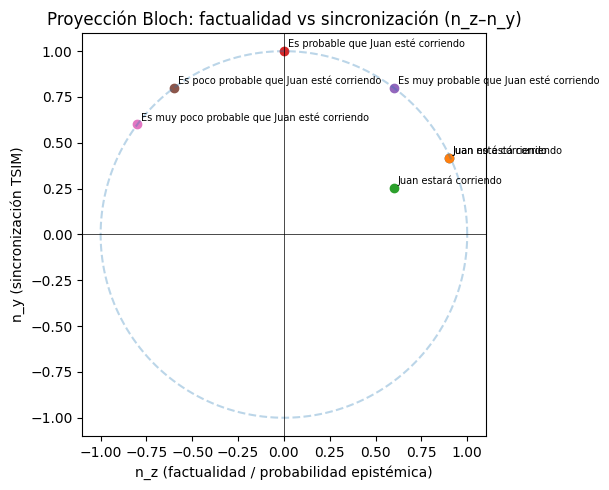

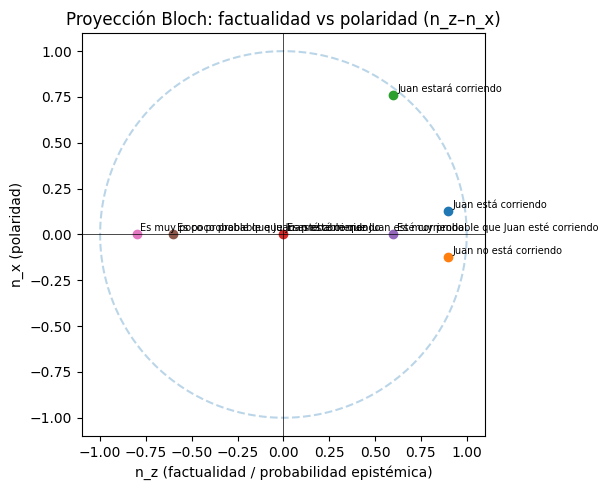

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# Utilidades: de (p, dirección_xy) a Bloch
# ======================================

def build_bloch_from_prob(p, base_x, base_y):
    """
    Construye un vector de Bloch (n_x, n_y, n_z) de norma 1 a partir de:
      - p: probabilidad epistémica de que la escena 'Juan está corriendo ahora' sea verdadera
      - base_x, base_y: dirección deseada en el plano x-y (polaridad / sincronización)

    Convenciones:
      n_z = 2p - 1
      n_x, n_y se escalan para que n_x^2 + n_y^2 = 1 - n_z^2
    """
    n_z = 2.0 * p - 1.0
    # máximo radio permitido en el plano perpendicular
    r_perp_max = np.sqrt(max(0.0, 1.0 - n_z**2))

    base_norm = np.sqrt(base_x**2 + base_y**2)
    if base_norm == 0:
        # si no damos dirección, lo ponemos todo en n_y por defecto
        n_x = 0.0
        n_y = r_perp_max
    else:
        scale = r_perp_max / base_norm
        n_x = scale * base_x
        n_y = scale * base_y

    return np.array([n_x, n_y, n_z])


def spinor_from_bloch(n):
    """
    Dado un vector de Bloch n = (n_x, n_y, n_z) con ||n|| = 1,
    devuelve un espinor normalizado psi tal que
      <psi|sigma_i|psi> = n_i
    """
    nx, ny, nz = n
    # ángulos esféricos
    theta = np.arccos(np.clip(nz, -1.0, 1.0))
    phi = np.arctan2(ny, nx)
    psi0 = np.cos(theta / 2.0)
    psi1 = np.exp(1j * phi) * np.sin(theta / 2.0)
    psi = np.array([psi0, psi1], dtype=complex)
    psi /= np.linalg.norm(psi)
    return psi


def bloch_from_spinor(psi):
    """
    Verificación: dado un espinor psi (2D),
    calcula el vector de Bloch (n_x, n_y, n_z).
    """
    sigma_x = np.array([[0, 1],
                        [1, 0]], dtype=complex)
    sigma_y = np.array([[0, -1j],
                        [1j,  0]], dtype=complex)
    sigma_z = np.array([[1, 0],
                        [0,-1]], dtype=complex)

    psi = psi / np.linalg.norm(psi)
    psi_col = psi.reshape(2,1)
    psi_dag = psi_col.conj().T

    n_x = (psi_dag @ sigma_x @ psi_col).real.item()
    n_y = (psi_dag @ sigma_y @ psi_col).real.item()
    n_z = (psi_dag @ sigma_z @ psi_col).real.item()
    return np.array([n_x, n_y, n_z])


# ======================================
# Definición de los 7 casos lingüísticos
# ======================================

# Cada entrada: (etiqueta, p, base_x, base_y, comentario)
# base_x controla polaridad (signo), base_y sincronización (alto = aquí y ahora)

cases = [
    # 1) Juan está corriendo
    (
        "Juan está corriendo",
        0.95,     # p ≈ certeza alta
        +0.3,     # polaridad positiva
        +1.0,     # alta sincronización (aquí y ahora)
        "Presente indicativo, polaridad positiva"
    ),

    # 2) Juan no está corriendo
    (
        "Juan no está corriendo",
        0.95,     # certeza alta de la frase negativa
        -0.3,     # polaridad negativa
        +1.0,     # misma sincronización
        "Presente indicativo, polaridad negativa"
    ),

    # 3) Juan estará corriendo (futuro inferido, escena paralela)
    (
        "Juan estará corriendo",
        0.80,     # bastante probable, pero no certeza
        +0.3,     # polaridad positiva
        0.1,      # casi sin sincronización directa (futuro / escena paralela)
        "Futuro inferido, baja sincronización"
    ),

    # 4) Es probable que Juan esté corriendo (~50 %)
    (
        "Es probable que Juan esté corriendo",
        0.50,     # 50 %
        0.0,      # polaridad neutra (descriptivo sobre probabilidad)
        +1.0,     # se refiere al ahora
        "Subjuntivo con probabilidad ≈50%"
    ),

    # 5) Es muy probable que Juan esté corriendo (~80 %)
    (
        "Es muy probable que Juan esté corriendo",
        0.80,     # 80 %
        0.0,
        +1.0,
        "Subjuntivo con probabilidad alta (~80%)"
    ),

    # 6) Es poco probable que Juan esté corriendo (~20 %)
    (
        "Es poco probable que Juan esté corriendo",
        0.20,     # 20 %
        0.0,
        +1.0,
        "Subjuntivo con probabilidad baja (~20%)"
    ),

    # 7) Es muy poco probable que Juan esté corriendo (~10 %)
    (
        "Es muy poco probable que Juan esté corriendo",
        0.10,     # 10 %
        0.0,
        +1.0,
        "Subjuntivo con probabilidad muy baja (~10%)"
    ),
]

# ======================================
# Cálculo de Bloch y espinores
# ======================================

results = []

print("Estados semánticos en la esfera de Bloch:\n")
for label, p, bx, by, comment in cases:
    n = build_bloch_from_prob(p, bx, by)
    psi = spinor_from_bloch(n)
    n_check = bloch_from_spinor(psi)

    results.append({
        "label": label,
        "p": p,
        "bloch": n,
        "psi": psi,
        "comment": comment
    })

    nx, ny, nz = n
    print(f"{label}:")
    print(f"  p = {p:.2f}")
    print(f"  Bloch (n_x, n_y, n_z) = ({nx:.3f}, {ny:.3f}, {nz:.3f})")
    print(f"  comentario: {comment}")
    # pequeña comprobación numérica
    err = np.linalg.norm(n - n_check)
    print(f"  verificación <sigma>· = Bloch: error = {err:.2e}\n")


# ======================================
# Gráficos: proyecciones n_z-n_y y n_z-n_x
# ======================================

# Círculo unidad para referencia
phi = np.linspace(0, 2*np.pi, 400)
circle_x = np.cos(phi)
circle_y = np.sin(phi)

# --- Proyección factualidad vs sincronización (n_z, n_y) ---
plt.figure(figsize=(6,5))
plt.plot(circle_x, circle_y, linestyle="--", alpha=0.3)
for r in results:
    nx, ny, nz = r["bloch"]
    plt.scatter(nz, ny)
    plt.text(nz + 0.02, ny + 0.02, r["label"], fontsize=7)

plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.xlabel("n_z (factualidad / probabilidad epistémica)")
plt.ylabel("n_y (sincronización TSIM)")
plt.title("Proyección Bloch: factualidad vs sincronización (n_z–n_y)")
plt.gca().set_aspect("equal")
plt.tight_layout()
plt.show()

# --- Proyección factualidad vs polaridad (n_z, n_x) ---
plt.figure(figsize=(6,5))
plt.plot(circle_x, circle_y, linestyle="--", alpha=0.3)
for r in results:
    nx, ny, nz = r["bloch"]
    plt.scatter(nz, nx)
    plt.text(nz + 0.02, nx + 0.02, r["label"], fontsize=7)

plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.xlabel("n_z (factualidad / probabilidad epistémica)")
plt.ylabel("n_x (polaridad)")
plt.title("Proyección Bloch: factualidad vs polaridad (n_z–n_x)")
plt.gca().set_aspect("equal")
plt.tight_layout()
plt.show()


In [ ]:
import re
from typing import Dict, Any

# --- Category definitions (simplified) ---

CATEGORIES = {
    1: "Present Progressive",
    2: "Present Habitual",
    3: "Iterative Present",
    4: "Universal/Scientific Present",
    5: "Immediate Future (periphrastic)",
    6: "Simple Future",
    7: "Future Perfect",
    8: "Simple Past (Pretérito)",
    9: "Present Perfect",
    10: "Past Progressive",
    11: "Pluperfect",
    12: "Past Anterior",
    13: "Conditional Simple",
    14: "Conditional Perfect",
    15: "Subjunctive Present",
    16: "Subjunctive Present Perfect",
    17: "Subjunctive Imperfect",
    18: "Subjunctive Pluperfect",
    19: "Negation",
    20: "Inferential Future",
    21: "Deontic Injunction",
    22: "Adversative Interference",
    23: "Spatial Deixis",
    24: "Temporal Deixis",
    25: "Probability Gradient",
    26: "Bare Noun / Noun Phrase",
}

# Muy simplificado: listas de patrones de superficie
PROB_WORDS = ["posiblemente", "probable", "probablemente"]
TEMPORAL_NOW = ["ahora"]
SPATIAL_HERE = ["aquí", "aca", "acá"]
ADVERSATIVE = ["aunque", "sin embargo"]
DEONTIC = ["quiero que", "te ordeno que", "espero que", "deseo que"]

# --- Simple normalization ---

def normalize(text: str) -> str:
    return re.sub(r"\s+", " ", text.strip().lower())


# --- Heuristic classifier ---

def classify_spanish_sentence(text: str) -> Dict[str, Any]:
    """
    Heuristic Neuronova-style classifier for Spanish verbal sentences.
    Returns: dict with category_id, category_label, matched_rules.
    """
    s = normalize(text)
    matched = []

    # 0. Bare noun (very naive)
    if " " not in s and re.match(r"^[a-záéíóúñü]+$", s):
        return {"category_id": 26, "category_label": CATEGORIES[26], "matched_rules": ["single_token"]}

    # 1. Negation
    if " no " in f" {s} ":
        matched.append("negation")

    # 2. Deontic Injunction
    if any(phrase in s for phrase in DEONTIC):
        return {"category_id": 21, "category_label": CATEGORIES[21], "matched_rules": ["deontic"]}

    # 3. Adversative Interference
    if any(word in s for word in ADVERSATIVE):
        return {"category_id": 22, "category_label": CATEGORIES[22], "matched_rules": ["adversative"]}

    # 4. Probability / Subjunctive cues
    has_prob = any(w in s for w in PROB_WORDS)

    # 5. Temporal / spatial deixis
    has_now = any(w in s for w in TEMPORAL_NOW)
    has_here = any(w in s for w in SPATIAL_HERE)

    # 6. Perfect tenses (very simplified patterns)
    if re.search(r"\bha\b.*ado|\bha\b.*ido|\bhas\b|\bhemos\b|\bhan\b", s):
        # present perfect or present perfect subjunctive
        if has_prob:
            return {"category_id": 16, "category_label": CATEGORIES[16], "matched_rules": ["probability", "ha+participle"]}
        else:
            return {"category_id": 9, "category_label": CATEGORIES[9], "matched_rules": ["ha+participle"]}

    if re.search(r"\bhubo\b.*ado|\bhubo\b.*ido", s):
        return {"category_id": 12, "category_label": CATEGORIES[12], "matched_rules": ["hubo+participle"]}

    if re.search(r"\bhabía\b.*ado|\bhabía\b.*ido", s):
        if has_prob:
            return {"category_id": 18, "category_label": CATEGORIES[18], "matched_rules": ["probability", "había+participle"]}
        else:
            return {"category_id": 11, "category_label": CATEGORIES[11], "matched_rules": ["había+participle"]}

    if re.search(r"\bhabrá\b.*ado|\bhabrá\b.*ido", s):
        return {"category_id": 7, "category_label": CATEGORIES[7], "matched_rules": ["habrá+participle"]}

    if re.search(r"\bhabría\b.*ado|\bhabría\b.*ido", s):
        return {"category_id": 14, "category_label": CATEGORIES[14], "matched_rules": ["habría+participle"]}

    # 7. Futuro simple e inferencial (estará)
    if re.search(r"\b(estará|estaré|estarás|estaremos|estarán)\b", s):
        # treat as inferential future when context is "ahora"
        return {"category_id": 20, "category_label": CATEGORIES[20], "matched_rules": ["estará"]}

    if re.search(r"\b([a-záéíóúñü]+)rá\b", s) and " habrá " not in s:
        # very naive future simple: verb ending in -rá, -ré, etc.
        return {"category_id": 6, "category_label": CATEGORIES[6], "matched_rules": ["future_simple"]}

    # 8. Periphrastic future
    if re.search(r"\b(voy|vas|va|vamos|van)\b\s+a\s+[a-záéíóúñü]+", s):
        return {"category_id": 5, "category_label": CATEGORIES[5], "matched_rules": ["ir+a+infinitive"]}

    # 9. Present progressive
    if re.search(r"\b(estoy|estás|está|estamos|están)\b\s+[a-záéíóúñü]+ando|\b(estoy|estás|está|estamos|están)\b\s+[a-záéíóúñü]+iendo", s):
        cat = 1
        if " no " in f" {s} ":
            cat = 19
        return {"category_id": cat, "category_label": CATEGORIES[cat], "matched_rules": ["estar+gerundio"]}

    # 10. Conditional simple (estaría, correría…)
    if re.search(r"\b[^\s]+ría\b", s) and "habría" not in s:
        return {"category_id": 13, "category_label": CATEGORIES[13], "matched_rules": ["conditional_simple"]}

    # 11. Subjunctive present (very naive: -e/-a endings + que)
    if has_prob and " haya " not in s and " hubiese " not in s and " estuviese " not in s:
        return {"category_id": 15, "category_label": CATEGORIES[15], "matched_rules": ["probability+subj"]}

    # 12. Probability gradient general (sin distinguir subj. exacto)
    if has_prob:
        return {"category_id": 25, "category_label": CATEGORIES[25], "matched_rules": ["probability"]}

    # 13. Temporal / spatial deixis (on top of other interpretations)
    if has_here:
        return {"category_id": 23, "category_label": CATEGORIES[23], "matched_rules": ["aquí"]}

    if has_now:
        return {"category_id": 24, "category_label": CATEGORIES[24], "matched_rules": ["ahora"]}

    # 14. Very rough simple past detection (-ó, -aron, etc.)
    if re.search(r"\b[a-záéíóúñü]+ó\b", s) or re.search(r"\b[a-záéíóúñü]+aron\b", s):
        return {"category_id": 8, "category_label": CATEGORIES[8], "matched_rules": ["simple_past"]}

    # 15. Default: treat as present habitual
    return {"category_id": 2, "category_label": CATEGORIES[2], "matched_rules": ["default_present"]}


# --- Quick demo ---

examples = [
    "Estoy cantando.",
    "Juan corre.",
    "El electrón es una particula.",
    "El sol ha salido hoy.",
    "El sol salió ayer.",
    "El sol va a salir en un momento.",
    "El sol habrá salido mañana.",
    "Juan estaría ahora en casa.",
    "Posiblemente esté ahora en casa.",
    "Posiblemente hubiese estado en casa.",
    "Juan no está corriendo.",
    "Quiero que vayas a casa.",
    "Aunque estudia, suspende."
]

for sent in examples:
    info = classify_spanish_sentence(sent)
    print(f"{sent} -> {info['category_label']} (rules: {info['matched_rules']})")


Estoy cantando. -> Present Progressive (rules: ['estar+gerundio'])
Juan corre. -> Present Habitual (rules: ['default_present'])
El electrón es una particula. -> Present Habitual (rules: ['default_present'])
El sol ha salido hoy. -> Present Perfect (rules: ['ha+participle'])
El sol salió ayer. -> Simple Past (Pretérito) (rules: ['simple_past'])
El sol va a salir en un momento. -> Immediate Future (periphrastic) (rules: ['ir+a+infinitive'])
El sol habrá salido mañana. -> Future Perfect (rules: ['habrá+participle'])
Juan estaría ahora en casa. -> Conditional Simple (rules: ['conditional_simple'])
Posiblemente esté ahora en casa. -> Subjunctive Present (rules: ['probability+subj'])
Posiblemente hubiese estado en casa. -> Probability Gradient (rules: ['probability'])
Juan no está corriendo. -> Negation (rules: ['estar+gerundio'])
Quiero que vayas a casa. -> Deontic Injunction (rules: ['deontic'])
Aunque estudia, suspende. -> Adversative Interference (rules: ['adversative'])


In [ ]:
import re
from typing import Dict, Any, Tuple, List

# --- Category labels (como antes) ---

CATEGORIES = {
    1: "Present Progressive",
    2: "Present Habitual",
    3: "Iterative Present",
    4: "Universal/Scientific Present",
    5: "Immediate Future (periphrastic)",
    6: "Simple Future",
    7: "Future Perfect",
    8: "Simple Past (Pretérito)",
    9: "Present Perfect",
    10: "Past Progressive",
    11: "Pluperfect",
    12: "Past Anterior",
    13: "Conditional Simple",
    14: "Conditional Perfect",
    15: "Subjunctive Present",
    16: "Subjunctive Present Perfect",
    17: "Subjunctive Imperfect",
    18: "Subjunctive Pluperfect",
    19: "Negation",
    20: "Inferential Future",
    21: "Deontic Injunction",
    22: "Adversative Interference",
    23: "Spatial Deixis",
    24: "Temporal Deixis",
    25: "Probability Gradient",
    26: "Bare Noun / Noun Phrase",
}

# --- Bloch map: valor "típico" por categoría ---
# n_z: factualidad / prob epistémica
# n_y: sincronización con el ahora del observador
# n_x: polaridad / conflicto

BLOCH_MAP: Dict[int, Tuple[float, float, float]] = {
    1:  (0.0, 0.6, 0.9),   # Present Progressive
    2:  (0.0, 0.3, 0.9),   # Present Habitual
    3:  (0.0, 0.3, 0.85),  # Iterative Present
    4:  (0.0, 0.0, 1.0),   # Universal/Scientific Present
    5:  (0.0, 0.4, 0.8),   # Immediate Future
    6:  (0.0, 0.1, 0.75),  # Simple Future
    7:  (0.0, 0.0, 0.65),  # Future Perfect
    8:  (0.0, 0.0, 0.9),   # Simple Past
    9:  (0.0, 0.4, 0.9),   # Present Perfect
    10: (0.0, 0.3, 0.8),   # Past Progressive
    11: (0.0, 0.0, 0.9),   # Pluperfect
    12: (0.0, 0.0, 0.9),   # Past Anterior
    13: (0.0, 0.4, 0.5),   # Conditional Simple
    14: (0.0, 0.2, 0.4),   # Conditional Perfect
    15: (0.0, 0.7, 0.0),   # Subjunctive Present
    16: (0.0, 0.5, 0.0),   # Subjunctive Pres. Perfect
    17: (0.0, 0.5, -0.3),  # Subjunctive Imperfect
    18: (0.0, 0.4, -0.5),  # Subjunctive Pluperfect
    19: (-0.4, 0.6, 0.9),  # Negation (misma factualidad, n_x<0)
    20: (0.0, 0.2, 0.7),   # Inferential Future
    21: (0.0, 0.6, 0.3),   # Deontic Injunction
    22: (-0.2, 0.4, 0.6),  # Adversative Interference
    23: (0.0, 0.3, 0.9),   # Spatial Deixis (hereda del verbo base)
    24: (0.0, 0.7, 0.9),   # Temporal Deixis (ahora)
    25: (0.0, 0.6, 0.0),   # Probability Gradient (~n_z ≈ 0, n_y alto)
    26: (0.0, 0.0, 0.0),   # Bare Noun (sin proposición)
}

# Si alguna categoría nueva no está en el mapa, devolvemos un valor neutro
def get_bloch_for_category(cat_id: int) -> Tuple[float, float, float]:
    return BLOCH_MAP.get(cat_id, (0.0, 0.0, 0.0))


In [ ]:
PROB_WORDS = ["posiblemente", "probable", "probablemente"]
TEMPORAL_NOW = ["ahora"]
SPATIAL_HERE = ["aquí", "aca", "acá"]
ADVERSATIVE = ["aunque", "sin embargo"]
DEONTIC = ["quiero que", "te ordeno que", "espero que", "deseo que"]

def normalize(text: str) -> str:
    return re.sub(r"\s+", " ", text.strip().lower())


def classify_spanish_sentence(text: str) -> Dict[str, Any]:
    """
    Devuelve:
      - category_id
      - category_label
      - matched_rules
      - bloch: (n_x, n_y, n_z)
    """
    s = normalize(text)
    matched: List[str] = []

    # Bare noun
    if " " not in s and re.match(r"^[a-záéíóúñü]+$", s):
        cat_id = 26
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["single_token"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Negation
    if " no " in f" {s} ":
        matched.append("negation")

    # Deontic Injunction
    if any(phrase in s for phrase in DEONTIC):
        cat_id = 21
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["deontic"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Adversative Interference
    if any(word in s for word in ADVERSATIVE):
        cat_id = 22
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["adversative"],
            "bloch": get_bloch_for_category(cat_id),
        }

    has_prob = any(w in s for w in PROB_WORDS)
    has_now = any(w in s for w in TEMPORAL_NOW)
    has_here = any(w in s for w in SPATIAL_HERE)

    # Perfects
    if re.search(r"\bha\b.*(ado|ido)\b|\bhas\b.*(ado|ido)\b|\bhemos\b.*(ado|ido)\b|\bhan\b.*(ado|ido)\b", s):
        if has_prob:
            cat_id = 16
        else:
            cat_id = 9
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["ha+participle"],
            "bloch": get_bloch_for_category(cat_id),
        }

    if re.search(r"\bhubo\b.*(ado|ido)\b", s):
        cat_id = 12
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["hubo+participle"],
            "bloch": get_bloch_for_category(cat_id),
        }

    if re.search(r"\bhabía\b.*(ado|ido)\b", s):
        if has_prob:
            cat_id = 18
        else:
            cat_id = 11
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["había+participle"],
            "bloch": get_bloch_for_category(cat_id),
        }

    if re.search(r"\bhabrá\b.*(ado|ido)\b", s):
        cat_id = 7
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["habrá+participle"],
            "bloch": get_bloch_for_category(cat_id),
        }

    if re.search(r"\bhabría\b.*(ado|ido)\b", s):
        cat_id = 14
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["habría+participle"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Future / inferential
    if re.search(r"\b(estará|estaré|estarás|estaremos|estarán)\b", s):
        cat_id = 20
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["estará"],
            "bloch": get_bloch_for_category(cat_id),
        }

    if re.search(r"\b[a-záéíóúñü]+rá\b", s) and " habrá " not in s:
        cat_id = 6
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["future_simple"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Periphrastic future
    if re.search(r"\b(voy|vas|va|vamos|van)\b\s+a\s+[a-záéíóúñü]+", s):
        cat_id = 5
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["ir+a+infinitive"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Present progressive
    if re.search(r"\b(estoy|estás|está|estamos|están)\b\s+[a-záéíóúñü]+(ando|iendo)\b", s):
        if " no " in f" {s} ":
            cat_id = 19
        else:
            cat_id = 1
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["estar+gerundio"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Conditional simple (correría, estaría…)
    if re.search(r"\b[a-záéíóúñü]+ría\b", s) and "habría" not in s:
        cat_id = 13
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["conditional_simple"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Subjunctive present-ish with probability words
    if has_prob and " haya " not in s and " hubiese " not in s and "había" not in s:
        cat_id = 15
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["probability+subj"],
            "bloch": get_bloch_for_category(cat_id),
        }

    if has_prob:
        cat_id = 25
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["probability"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Spatial / temporal deixis
    if has_here:
        cat_id = 23
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["aquí"],
            "bloch": get_bloch_for_category(cat_id),
        }

    if has_now:
        cat_id = 24
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["ahora"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Very rough simple past
    if re.search(r"\b[a-záéíóúñü]+ó\b", s) or re.search(r"\b[a-záéíóúñü]+aron\b", s):
        cat_id = 8
        return {
            "category_id": cat_id,
            "category_label": CATEGORIES[cat_id],
            "matched_rules": ["simple_past"],
            "bloch": get_bloch_for_category(cat_id),
        }

    # Default → Present Habitual
    cat_id = 2
    return {
        "category_id": cat_id,
        "category_label": CATEGORIES[cat_id],
        "matched_rules": ["default_present"],
        "bloch": get_bloch_for_category(cat_id),
    }


Estoy cantando. -> Present Progressive | Bloch = (0.00, 0.60, 0.90)
Juan corre. -> Present Habitual | Bloch = (0.00, 0.30, 0.90)
El electrón es una particula. -> Present Habitual | Bloch = (0.00, 0.30, 0.90)
El sol ha salido hoy. -> Present Perfect | Bloch = (0.00, 0.40, 0.90)
El sol salió ayer. -> Simple Past (Pretérito) | Bloch = (0.00, 0.00, 0.90)
El sol va a salir en un momento. -> Immediate Future (periphrastic) | Bloch = (0.00, 0.40, 0.80)
El sol habrá salido mañana. -> Future Perfect | Bloch = (0.00, 0.00, 0.65)
Juan estaría ahora en casa. -> Conditional Simple | Bloch = (0.00, 0.40, 0.50)
Posiblemente esté ahora en casa. -> Subjunctive Present | Bloch = (0.00, 0.70, 0.00)
Posiblemente hubiese estado en casa. -> Probability Gradient | Bloch = (0.00, 0.60, 0.00)
Juan no está corriendo. -> Negation | Bloch = (-0.40, 0.60, 0.90)
Quiero que vayas a casa. -> Deontic Injunction | Bloch = (0.00, 0.60, 0.30)
Aunque estudia, suspende. -> Adversative Interference | Bloch = (-0.20, 0.40, 0

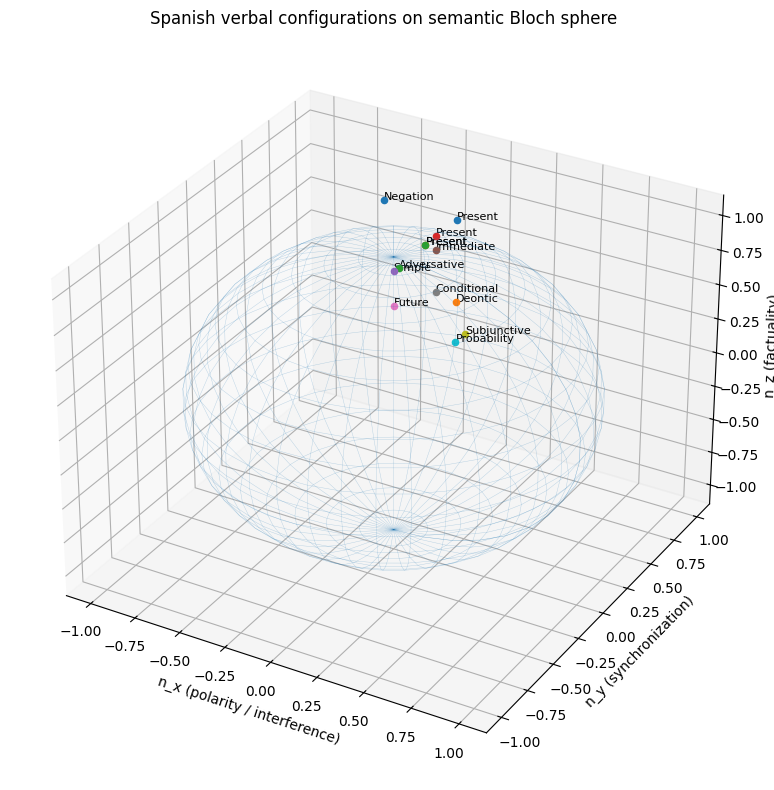

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D

# Ejemplos de prueba
examples = [
    "Estoy cantando.",
    "Juan corre.",
    "El electrón es una particula.",
    "El sol ha salido hoy.",
    "El sol salió ayer.",
    "El sol va a salir en un momento.",
    "El sol habrá salido mañana.",
    "Juan estaría ahora en casa.",
    "Posiblemente esté ahora en casa.",
    "Posiblemente hubiese estado en casa.",
    "Juan no está corriendo.",
    "Quiero que vayas a casa.",
    "Aunque estudia, suspende."
]

results = []
for sent in examples:
    info = classify_spanish_sentence(sent)
    n_x, n_y, n_z = info["bloch"]
    results.append({
        "sentence": sent,
        "category": info["category_label"],
        "nx": n_x,
        "ny": n_y,
        "nz": n_z,
    })
    print(f"{sent} -> {info['category_label']} | Bloch = ({n_x:.2f}, {n_y:.2f}, {n_z:.2f})")

# Dibujar esfera de Bloch "wireframe" + puntos
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Malla para esfera
u = np.linspace(0, 2 * np.pi, 40)
v = np.linspace(0, np.pi, 20)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))

ax.plot_wireframe(x, y, z, linewidth=0.3, alpha=0.3)

# Puntos clasificados
for r in results:
    ax.scatter(r["nx"], r["ny"], r["nz"])
    ax.text(r["nx"], r["ny"], r["nz"], r["category"].split()[0], fontsize=8)

ax.set_xlabel("n_x (polarity / interference)")
ax.set_ylabel("n_y (synchronization)")
ax.set_zlabel("n_z (factuality)")
ax.set_title("Spanish verbal configurations on semantic Bloch sphere")
plt.tight_layout()
plt.show()


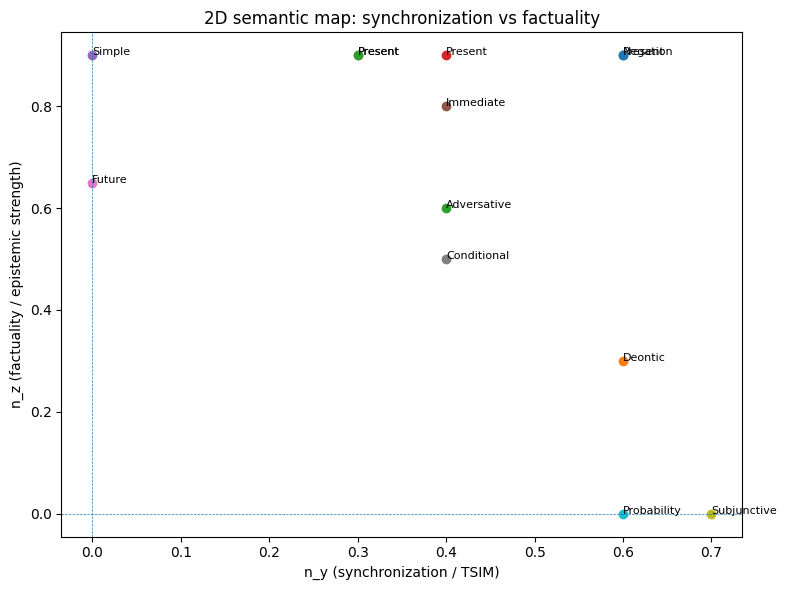

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for r in results:
    ax.scatter(r["ny"], r["nz"])
    ax.text(r["ny"], r["nz"], r["category"].split()[0], fontsize=8)

ax.axhline(0, linestyle='--', linewidth=0.5)
ax.axvline(0, linestyle='--', linewidth=0.5)
ax.set_xlabel("n_y (synchronization / TSIM)")
ax.set_ylabel("n_z (factuality / epistemic strength)")
ax.set_title("2D semantic map: synchronization vs factuality")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from dataclasses import dataclass, field
from typing import Dict, Optional, Callable, Tuple

# =========================
# 1. Basic structures
# =========================

@dataclass
class NounField:
    """
    Simplified noun field for Neuronova.
    """
    name: str
    field: np.ndarray              # 1D grid intensity
    energy: float = 0.0
    features: Dict[str, float] = field(default_factory=dict)
    owner: Optional[str] = None
    position: float = 0.0          # center position on grid
    velocity: float = 0.0          # scalar velocity


@dataclass
class SceneState:
    nouns: Dict[str, NounField] = field(default_factory=dict)
    possession: Dict[Tuple[str, str], bool] = field(default_factory=dict)

    def add_noun(self, noun: NounField):
        self.nouns[noun.name] = noun
        if noun.owner is not None:
            self.possession[(noun.owner, noun.name)] = True

    def set_possession(self, owner: str, obj: str, value: bool):
        key = (owner, obj)
        if value:
            self.possession[key] = True
        elif key in self.possession:
            del self.possession[key]

    def has_possession(self, owner: str, obj: str) -> bool:
        return self.possession.get((owner, obj), False)


# =========================
# 2. Operators
# =========================

def V_move(scene: SceneState, noun_name: str, dt: float = 1.0):
    """
    Intransitive motion: moves noun along the 1D grid using its velocity.
    """
    if noun_name not in scene.nouns:
        raise ValueError(f"Noun {noun_name} not found in scene.")

    noun = scene.nouns[noun_name]
    v = noun.velocity
    if v == 0.0:
        return scene  # no movement

    N = len(noun.field)
    shift = int(round(v * dt))
    new_field = np.zeros_like(noun.field)

    if shift > 0:
        new_field[shift:] = noun.field[:-shift]
    elif shift < 0:
        new_field[:shift] = noun.field[-shift:]
    else:
        new_field = noun.field.copy()

    noun.field = new_field
    noun.position += v * dt
    scene.nouns[noun_name] = noun
    return scene


def apply_Juan_runs(scene: SceneState, dt: float = 1.0):
    return V_move(scene, "Juan", dt=dt)


def V_transform_substrate(substrate: NounField, intensity: float = 1.0) -> NounField:
    """
    Simple substrate transformation (e.g. paper being written on).
    """
    substrate.field = substrate.field * (1.0 + intensity)
    substrate.features["structured"] = substrate.features.get("structured", 0.0) + intensity
    return substrate


def V_create_book(scene: SceneState,
                  creator_name: str,
                  substrate_name: str,
                  new_book_name: str = "book"):
    """
    Creation/emersion operator: 'Juan writes a book'.
    """
    if creator_name not in scene.nouns:
        raise ValueError(f"Creator {creator_name} not found.")
    if substrate_name not in scene.nouns:
        raise ValueError(f"Substrate {substrate_name} not found.")

    substrate = scene.nouns[substrate_name]
    substrate = V_transform_substrate(substrate, intensity=0.5)
    scene.nouns[substrate_name] = substrate

    N = len(substrate.field)
    book_field = np.zeros(N)
    center = int(round(substrate.position))
    left = max(center - 2, 0)
    right = min(center + 3, N)
    book_field[left:right] = 1.0  # compact support

    book = NounField(
        name=new_book_name,
        field=book_field,
        energy=0.0,
        features={"created_by": creator_name, "structured": 1.0},
        owner=creator_name,
        position=substrate.position,
        velocity=0.0,
    )
    scene.add_noun(book)
    return scene


def apply_Juan_writes_a_book(scene: SceneState):
    return V_create_book(scene, creator_name="Juan", substrate_name="paper", new_book_name="book")


def V_destroy(scene: SceneState, noun_name: str, residual_factor: float = 0.0):
    """
    Destruction operator: collapses / reduces a noun field.
    """
    if noun_name not in scene.nouns:
        raise ValueError(f"Noun {noun_name} not found in scene.")

    noun = scene.nouns[noun_name]
    noun.field = noun.field * residual_factor
    noun.energy = noun.energy * residual_factor
    scene.nouns[noun_name] = noun
    return scene


def T_energy_transfer(scene: SceneState, source_name: str, target_name: str, efficiency: float = 1.0):
    """
    Transfers energy from source noun to target noun.
    """
    if source_name not in scene.nouns or target_name not in scene.nouns:
        raise ValueError("Source or target noun not found.")

    source = scene.nouns[source_name]
    target = scene.nouns[target_name]

    delta = efficiency * source.energy
    target.energy += delta
    source.energy -= delta

    scene.nouns[source_name] = source
    scene.nouns[target_name] = target
    return scene


def apply_Juan_eats_an_apple(scene: SceneState, efficiency: float = 0.8):
    scene = T_energy_transfer(scene, source_name="apple", target_name="Juan", efficiency=efficiency)
    scene = V_destroy(scene, noun_name="apple", residual_factor=0.0)
    return scene


def apply_Juan_throws_a_stone(scene: SceneState,
                              energy_efficiency: float = 0.7,
                              stone_velocity: float = 2.0,
                              dt: float = 1.0):
    """
    'Juan throws a stone' = energy transfer + induced motion.
    """
    if "Juan" not in scene.nouns or "stone" not in scene.nouns:
        raise ValueError("Juan or stone not found in scene.")

    scene = T_energy_transfer(scene, source_name="Juan", target_name="stone",
                              efficiency=energy_efficiency)

    stone = scene.nouns["stone"]
    stone.velocity = stone_velocity
    scene.nouns["stone"] = stone

    scene = V_move(scene, "stone", dt=dt)
    return scene


def V_transform_patient(scene: SceneState,
                        patient_name: str,
                        transform_fn: Optional[Callable[[Dict[str, float]], Dict[str, float]]] = None):
    """
    Transformation on patient's internal configuration (features).
    """
    if patient_name not in scene.nouns:
        raise ValueError(f"Patient {patient_name} not found in scene.")

    patient = scene.nouns[patient_name]
    if transform_fn is None:
        hair_order = patient.features.get("hair_order", 0.0)
        cleanliness = patient.features.get("cleanliness", 0.0)
        patient.features["hair_order"] = hair_order + 1.0
        patient.features["cleanliness"] = cleanliness + 0.2
    else:
        patient.features = transform_fn(patient.features)

    scene.nouns[patient_name] = patient
    return scene


def apply_Juan_combs_Maria(scene: SceneState):
    return V_transform_patient(scene, patient_name="Maria")


def T_possession_transfer(scene: SceneState,
                          obj_name: str,
                          from_owner: str,
                          to_owner: str):
    """
    Transfer of possession: from one owner to another.
    """
    if obj_name not in scene.nouns:
        raise ValueError(f"Object {obj_name} not found in scene.")

    obj = scene.nouns[obj_name]

    # Remove previous possession
    if scene.has_possession(from_owner, obj_name):
        scene.set_possession(from_owner, obj_name, False)

    # Set new possession
    scene.set_possession(to_owner, obj_name, True)
    obj.owner = to_owner
    scene.nouns[obj_name] = obj

    return scene


def apply_Juan_gives_a_present_to_Maria(scene: SceneState):
    return T_possession_transfer(scene,
                                 obj_name="present",
                                 from_owner="Juan",
                                 to_owner="Maria")


# =========================
# 3. Init scene + DEMO
# =========================

def init_example_scene(grid_size: int = 50) -> SceneState:
    x = np.linspace(0, 1, grid_size)

    juan = NounField(
        name="Juan",
        field=np.exp(-100 * (x - 0.3) ** 2),
        energy=10.0,
        features={"health": 1.0},
        owner=None,
        position=0.3 * (grid_size - 1),
        velocity=1.0,
    )

    maria = NounField(
        name="Maria",
        field=np.exp(-100 * (x - 0.7) ** 2),
        energy=8.0,
        features={"hair_order": 0.0, "cleanliness": 0.5},
        owner=None,
        position=0.7 * (grid_size - 1),
        velocity=0.0,
    )

    apple = NounField(
        name="apple",
        field=np.exp(-200 * (x - 0.4) ** 2),
        energy=5.0,
        features={"edible": 1.0},
        owner=None,
        position=0.4 * (grid_size - 1),
        velocity=0.0,
    )

    stone = NounField(
        name="stone",
        field=np.exp(-200 * (x - 0.4) ** 2),
        energy=1.0,
        features={},
        owner=None,
        position=0.4 * (grid_size - 1),
        velocity=0.0,
    )

    paper = NounField(
        name="paper",
        field=np.ones(grid_size) * 0.1,
        energy=0.5,
        features={"structured": 0.0},
        owner="Juan",
        position=0.5 * (grid_size - 1),
        velocity=0.0,
    )

    present = NounField(
        name="present",
        field=np.exp(-150 * (x - 0.5) ** 2),
        energy=2.0,
        features={"wrapped": 1.0},
        owner="Juan",
        position=0.5 * (grid_size - 1),
        velocity=0.0,
    )

    scene = SceneState()
    for n in [juan, maria, apple, stone, paper, present]:
        scene.add_noun(n)

    return scene


# =========================
# 4. Run all verbs and PRINT
# =========================

scene = init_example_scene()

print("=== INITIAL STATE ===")
print("Juan energy:", scene.nouns["Juan"].energy)
print("Apple energy:", scene.nouns["apple"].energy)
print("Stone energy:", scene.nouns["stone"].energy)
print("Maria features:", scene.nouns["Maria"].features)
print("Possession:", scene.possession)
print()

# 1) Juan corre
scene = apply_Juan_runs(scene, dt=1.0)
print("After 'Juan runs': Juan position =", scene.nouns["Juan"].position)

# 2) Juan escribe un libro
scene = apply_Juan_writes_a_book(scene)
print("\nAfter 'Juan writes a book':")
print("Book in scene?", "book" in scene.nouns)
if "book" in scene.nouns:
    print("Book owner:", scene.nouns["book"].owner)
    print("Book features:", scene.nouns["book"].features)

# 3) Juan come una manzana
scene = apply_Juan_eats_an_apple(scene)
print("\nAfter 'Juan eats an apple':")
print("Juan energy:", scene.nouns["Juan"].energy)
print("Apple energy:", scene.nouns["apple"].energy)
print("Apple field sum (should be 0):", scene.nouns["apple"].field.sum())

# 4) Juan tira una piedra
scene = apply_Juan_throws_a_stone(scene, dt=1.0)
print("\nAfter 'Juan throws a stone':")
print("Stone energy:", scene.nouns["stone"].energy)
print("Stone position:", scene.nouns["stone"].position)

# 5) Juan peina a Maria
scene = apply_Juan_combs_Maria(scene)
print("\nAfter 'Juan combs Maria':")
print("Maria features:", scene.nouns["Maria"].features)

# 6) Juan le da un regalo a Maria
scene = apply_Juan_gives_a_present_to_Maria(scene)
print("\nAfter 'Juan gives a present to Maria':")
print("Possession:", scene.possession)
print("Present owner:", scene.nouns["present"].owner)


=== INITIAL STATE ===
Juan energy: 10.0
Apple energy: 5.0
Stone energy: 1.0
Maria features: {'hair_order': 0.0, 'cleanliness': 0.5}
Possession: {('Juan', 'paper'): True, ('Juan', 'present'): True}

After 'Juan runs': Juan position = 15.7

After 'Juan writes a book':
Book in scene? True
Book owner: Juan
Book features: {'created_by': 'Juan', 'structured': 1.0}

After 'Juan eats an apple':
Juan energy: 14.0
Apple energy: 0.0
Apple field sum (should be 0): 0.0

After 'Juan throws a stone':
Stone energy: 10.799999999999999
Stone position: 21.6

After 'Juan combs Maria':
Maria features: {'hair_order': 1.0, 'cleanliness': 0.7}

After 'Juan gives a present to Maria':
Possession: {('Juan', 'paper'): True, ('Juan', 'book'): True, ('Maria', 'present'): True}
Present owner: Maria
